In [1]:
# Librairies to import :

import re
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:

data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

print(data_2015.shape)
data_2015.head()

(3340, 47)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
print(data_2016.shape)
data_2016.head()

(3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


The columns seem to be different for both datasets, let's check this out :

In [4]:
print(data_2015.columns.tolist())
print('')
print(data_2016.columns.tolist())

['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'Location', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment', 'ComplianceStatus', 'Outlier', '2010 Census Tracts', 'Seattle Police Department Micro Communit

In [5]:
# Comparison of the features from both datasets :
L0 = []
for col in data_2015.columns.tolist():
    if col in data_2016.columns.tolist():
        print(col)
    else :
        L0.append(col)

print('')

L1 = []
for col in data_2016.columns.tolist():
    if col in data_2015.columns.tolist():
        print(col)
    else :
        L1.append(col)

print('')
        
print("These columns are in the 2015 dataset but not in the one from 2016 : ", L0)
print('')
for ex in L0:
    print('')
    print(ex)
    print(data_2015[ex])
    print('')
print('')
print("These columns are in the 2016 dataset but not in the one from 2015 : ", L1) 
for ex in L1:
    print('')
    print(ex)
    print(data_2016[ex])
    print('')
        

OSEBuildingID
DataYear
BuildingType
PrimaryPropertyType
PropertyName
TaxParcelIdentificationNumber
CouncilDistrictCode
Neighborhood
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
ListOfAllPropertyUseTypes
LargestPropertyUseType
LargestPropertyUseTypeGFA
SecondLargestPropertyUseType
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType
ThirdLargestPropertyUseTypeGFA
YearsENERGYSTARCertified
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
DefaultData
ComplianceStatus
Outlier

OSEBuildingID
DataYear
BuildingType
PrimaryPropertyType
PropertyName
TaxParcelIdentificationNumber
CouncilDistrictCode
Neighborhood
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
ListOfAllPropertyUseTypes
LargestPropertyUseType
Large

If we want to build a model using all of the data from both datasets, we should group the corresponding columns together like 'Zip Codes' and 'ZipCode' for instance.

In [6]:
data_2015['Location'][1]

'{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [7]:
print(data_2016['Longitude'])
#print(data_2016)

0      -122.33799
1      -122.33393
2      -122.33810
3      -122.33664
4      -122.34047
          ...    
3371   -122.31154
3372   -122.32283
3373   -122.35784
3374   -122.32431
3375   -122.29536
Name: Longitude, Length: 3376, dtype: float64


As we can see here, the feature 'Location' from data_2015 include the same information than the features 'Address', 'City', 'State', 'Latitude', 'Longitude', et 'ZipCode' from data_2016. We are going to treat this by extracting these informations to new columuns in data_2015 and removing 'Location' then :

In [8]:
# Testing the way we are going to extract the information from 'Location' :

import ast
c = data_2015['Location'][0]
obj = ast.literal_eval(c)
print(obj)
print(type(obj))
print(obj['longitude'])
print(obj['latitude'])
print(obj['human_address'])
print(type(obj['human_address']))
c2 = obj['human_address']
obj2 = ast.literal_eval(c2)
print(obj2)
print(type(obj2))
print(obj2['address'])

{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
<class 'dict'>
-122.33799744
47.61219025
{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}
<class 'str'>
{'address': '405 OLIVE WAY', 'city': 'SEATTLE', 'state': 'WA', 'zip': '98101'}
<class 'dict'>
405 OLIVE WAY


In [9]:
## Implementing the processing all over the dataset from 2015 :
import ast
import numpy as np

# Creation of the new columns with the same names as in data_2016 :
data_2015['Latitude'] = 0
data_2015['Longitude'] = 0
data_2015['Address'] = np.nan
data_2015['City'] = np.nan
data_2015['State'] = np.nan
data_2015['ZipCode'] = 0

# Extraction and assignation of the values for each row :
for i in data_2015.index:
    dict1 = ast.literal_eval(data_2015['Location'][i]) # transformation of the value of 'Location' as a dict
    data_2015['Latitude'][i] = dict1['latitude'] # extraction and assignation of 'Latitude'
    data_2015['Longitude'][i] = dict1['longitude'] # extraction and assignation of 'Longitude'
    dict2 = ast.literal_eval(dict1['human_address']) # transformation of the value of the second 'dict' as a real dict
    data_2015['Address'][i] = dict2['address'] # extraction and assignation of 'Address'
    data_2015['City'][i] = dict2['city'] # extraction and assignation of 'City'
    data_2015['State'][i] = dict2['state'] # extraction and assignation of 'State'
    data_2015['ZipCode'][i] = dict2['zip'] # extraction and assignation of 'zip'

# Suppression of 'Location' feature :
data_2015.drop(columns=['Location'], inplace = True)
    
# Checking the changes over the 10 first rows :
data_2015.head(10)

C:\Users\may81\AppData\Local\Temp/ipykernel_35232/3603813004.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Latitude'][i] = dict1['latitude'] # extraction and assignation of 'Latitude'
C:\Users\may81\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/3603813004.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1,...,56.0,NaN,7.0,19576,47.6164389,-122.33676431,810 VIRGINIA ST,SEATTLE,WA,98101
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1,...,14.0,NaN,31.0,18081,47.6141141,-122.33274086,1619 9TH AVE,SEATTLE,WA,98101
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1,...,14.0,NaN,31.0,18081,47.61290234,-122.33130949,901 PINE ST,SEATTLE,WA,98101
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1,...,14.0,NaN,19.0,18379,47.60258934,-122.33255325,612 2ND AVE,SEATTLE,WA,98104
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,939000105,7,DOWNTOWN,1910,1,...,14.0,NaN,19.0,18379,47.60278416,-122.33214887,607 3RD AVE,SEATTLE,WA,98104


Let's see the other remaining differences in columns between both datasets :

In [10]:
# Comparison of the features from both datasets :
L0 = []
for col in data_2015.columns.tolist():
    if col in data_2016.columns.tolist():
        pass
    else :
        L0.append(col)

print('')

L1 = []
for col in data_2016.columns.tolist():
    if col in data_2015.columns.tolist():
        pass
    else :
        L1.append(col)

print('')
        
print("These columns are in the 2015 dataset but not in the one from 2016 : ", L0)
print('')

print("These columns are in the 2016 dataset but not in the one from 2015 : ", L1) 




These columns are in the 2015 dataset but not in the one from 2016 :  ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']

These columns are in the 2016 dataset but not in the one from 2015 :  ['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


#### Some of the features from data_2015 seem to have a direct equivalent in data_2016 but with different name, let's check this :

In [11]:
print(data_2015['Comment'][0:20])
print(data_2016['Comments'][0:20])
print('')
print(data_2015['Zip Codes'][0:20])
print(data_2015['ZipCode'][0:20])
print(data_2016['ZipCode'][0:20])
print('')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: Comment, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Comments, dtype: float64

0     18081
1     18081
2     18081
3     18081
4     19576
5     19576
6     18081
7     18081
8     18379
9     18379
10    18081
11    18081
12    18081
13    18081
14    18081
15    18379
16    18379
17    18379
18    18379
19    18379
Name: Zip Codes, dtype: int64
0     98101
1     98101
2     98101
3     98101
4     98121
5     98101
6     98101
7     98101
8     98104
9     98104
10    98101
11    98101
12    98104
13    98101
14    98101
15    98104
16    98104
17    98104
18    98104
19    98104
Name: ZipCode, dtype: int64
0     98101.0
1     9

#### "Comment" & "Comments" would be renamed the same ("Comment") and the "Zip Codes" feature will be deleted as the true information seems in "ZipCode", feature created from the former  "Location" feature in data_2015 :

In [12]:
def feature_comments(data):
    data.rename(columns={"Comment": "Comments"}, inplace=True)
    return()

feature_comments(data_2015)

()

In [13]:
def feature_zipcode(data):
    data.drop(columns=['Zip Codes'], inplace=True)
    return()

feature_zipcode(data_2015)

()

#### Let's compare once again the remaining differences in features between data_2015 and data_2016 :

In [14]:
# Comparison of the features from both datasets :
L0 = []
for col in data_2015.columns.tolist():
    if col in data_2016.columns.tolist():
        pass
    else :
        L0.append(col)

print('')

L1 = []
for col in data_2016.columns.tolist():
    if col in data_2015.columns.tolist():
        pass
    else :
        L1.append(col)

print('')
        
print("These columns are in the 2015 dataset but not in the one from 2016 : ", L0)
print('')

print("These columns are in the 2016 dataset but not in the one from 2015 : ", L1) 




These columns are in the 2015 dataset but not in the one from 2016 :  ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats']

These columns are in the 2016 dataset but not in the one from 2015 :  ['TotalGHGEmissions', 'GHGEmissionsIntensity']


#### 'GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)' from data_2015 seem to be equivalent to 'TotalGHGEmissions' and 'GHGEmissionsIntensity' from data_2016. Let's check this :

In [15]:
data_2015[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000
mean,110.094102,0.985339
std,409.450179,1.637172
min,0.000000,0.000000
25%,9.265000,0.080000
50%,32.740000,0.460000
75%,88.642500,1.180000
max,11824.890000,31.380000


In [16]:
data_2016[['TotalGHGEmissions', 'GHGEmissionsIntensity']].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,3367.000000,3367.000000
mean,119.723971,1.175916
std,538.832227,1.821452
min,-0.800000,-0.020000
25%,9.495000,0.210000
50%,33.920000,0.610000
75%,93.940000,1.370000
max,16870.980000,34.090000


#### These pairs of features seem equivalent as expected, so we rename one of the pair (the one from 2015 here) :

In [17]:
def feature_rename_emissions(data):
    data.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions", 
                         "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"}, 
                inplace=True)
    return()

feature_rename_emissions(data_2015)

()

#### Some of the features from 2015 have no equivalent in data_2016 : 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Districts' and 'SPD Beats' :

In [18]:
features_not_in_2016 = ['OtherFuelUse(kBtu)',
                        '2010 Census Tracts', 
                        'Seattle Police Department Micro Community Policing Plan Areas', 
                        'City Council Districts', 
                        'SPD Beats']
data_2015[features_not_in_2016].head(10)


,OtherFuelUse(kBtu),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,0.0,NaN,14.0,NaN,31.0
1,0.0,NaN,14.0,NaN,31.0
2,0.0,NaN,56.0,NaN,31.0
3,0.0,NaN,56.0,NaN,31.0
4,0.0,NaN,56.0,NaN,31.0
5,0.0,NaN,56.0,NaN,7.0
6,0.0,NaN,14.0,NaN,31.0
7,0.0,NaN,14.0,NaN,31.0
8,0.0,NaN,14.0,NaN,19.0
9,0.0,NaN,14.0,NaN,19.0


#### Let's just remove them are they will not be useful by combining both datasets :

In [19]:
def drop_unique_features(dataframe):
    dataframe.drop(columns=features_not_in_2016, inplace=True)
    return()

drop_unique_features(data_2015)

()

#### Let's check the absence of remaining different features from both datasets :

In [20]:
# Comparison of the features from both datasets :
L0 = []
for col in data_2015.columns.tolist():
    if col in data_2016.columns.tolist():
        pass
    else :
        L0.append(col)

print('')

L1 = []
for col in data_2016.columns.tolist():
    if col in data_2015.columns.tolist():
        pass
    else :
        L1.append(col)

print('')
        
print("These columns are in the 2015 dataset but not in the one from 2016 : ", L0)
print('')

print("These columns are in the 2016 dataset but not in the one from 2015 : ", L1) 




These columns are in the 2015 dataset but not in the one from 2016 :  []

These columns are in the 2016 dataset but not in the one from 2015 :  []


#### Next step is the concatenation of both datasets, looking at the changes in types of some features :

In [21]:
for col1 in data_2015.columns:
    for col2 in data_2016.columns:
        if col1==col2:
            if data_2015.dtypes[col1]!=data_2016.dtypes[col2]:
                print("La colonne de data_2015 nommée ",col1,
                      " est de type ",data_2015.dtypes[col1],
                      " alors qu'elle est de type ",data_2016.dtypes[col2]," dans data_2016")

La colonne de data_2015 nommée  NumberofBuildings  est de type  int64  alors qu'elle est de type  float64  dans data_2016
La colonne de data_2015 nommée  NumberofFloors  est de type  float64  alors qu'elle est de type  int64  dans data_2016
La colonne de data_2015 nommée  DefaultData  est de type  object  alors qu'elle est de type  bool  dans data_2016
La colonne de data_2015 nommée  Comments  est de type  object  alors qu'elle est de type  float64  dans data_2016
La colonne de data_2015 nommée  Latitude  est de type  object  alors qu'elle est de type  float64  dans data_2016
La colonne de data_2015 nommée  Longitude  est de type  object  alors qu'elle est de type  float64  dans data_2016
La colonne de data_2015 nommée  ZipCode  est de type  int64  alors qu'elle est de type  float64  dans data_2016


In [22]:
def concat_datasets(data1, data2):
    data = pd.concat([data1, data2], ignore_index = True)
    return(data)

data = concat_datasets(data_2015, data_2016)

print("Dimensions de data_2015 : ", data_2015.shape)
print("Dimensions de data_2016 : ", data_2016.shape)
print("Dimensions de data : ", data.shape)

data.dtypes

Dimensions de data_2015 :  (3340, 46)
Dimensions de data_2016 :  (3376, 46)
Dimensions de data :  (6716, 46)


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

#### Now, he have a unique dataset which we are going to explore a bit more to select the right features and perform useful preprocessing steps further.

In [23]:
data.to_csv("concatenated_data.csv")

In [24]:
concatenated_data = data.copy() # for further use with pipelines

## Data exploration & Feature selection

The main objective of this part is to determine which feature would be useful to predict emissions and energy consumption and select the right target features.

In [25]:
# Typology of each features : examples of values
for col in data.columns:
    print(col)
    print(data[col].unique()[0:10])
    print('')
    print('- '*30)

OSEBuildingID
[ 1  2  3  5  8  9 10 11 12 13]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
DataYear
[2015 2016]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BuildingType
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PrimaryPropertyType
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility\n' 'Distribution Center' 'Large Office']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PropertyName
['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' 'HOTEL MAX'
 'WARWICK SEATTLE HOTEL' 'WEST PRECINCT (SEATTLE POLICE)'
 'CAMLIN WORLDMARK HOTEL' 'PARAMOUNT THEATER'
 'COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE' 'LYON BUILDING']

- - - - - - - - - - - - - - - - - - - - - - - - -

#### Firstly, we can remove all of the measures related to residential buildings as this study doesn't rely on these buildings :

In [26]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [27]:
data.shape

(6716, 46)

In [28]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class Select_building_types(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Select_building_types")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        self.features = list(X_.columns)
        return X_[~X_['BuildingType'].str.contains("Multifamily")]
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [29]:
tf1_select_building_types = Select_building_types()

tf1_select_building_types.fit(data)

Going through Select_building_types
Shape of data at this point :  (6716, 46)


Select_building_types()

In [30]:
data = tf1_select_building_types.transform(data)

In [31]:
print(data['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']


In [32]:
print("The shape of data is now ", data.shape)

The shape of data is now  (3318, 46)


#### We can then check if any feature has too much missing values :

In [33]:
for (columnName, columnData) in data.iteritems(): 
    print('Nom de la colonne : ', columnName) 
    print('Proportion de valeurs manquantes "NaN" : ', np.round(100*columnData.isna().sum()/data.shape[0]),'%')
    print('- '*30)

Nom de la colonne :  OSEBuildingID
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  DataYear
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  BuildingType
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  PrimaryPropertyType
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  PropertyName
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  TaxParcelIdentificationNumber
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Nom de la colonne :  CouncilDistrictCode
Proportion de valeurs manquantes "NaN" :  0.0 %
- - - - - - - - - - - - - - - - 

The following features will be deleted because of the over proportion of missing values : 'Comments' and 'YearsENERGYSTARCertified'.

The feature 'Outlier' would not be deleted now but be useful to delete outliers further.

In [34]:
from sklearn.preprocessing import FunctionTransformer

print("Shape before transforming data : ", data.shape)

class Remove_nan_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Remove_nan_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.drop(columns=['Comments'], inplace=True)
        X_.drop(columns=['YearsENERGYSTARCertified'], inplace=True)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf2_remove_nan_features = Remove_nan_features()

tf2_remove_nan_features.fit(data)

data = tf2_remove_nan_features.transform(data)
    
print("Shape after transforming data : ", data.shape)

Shape before transforming data :  (3318, 46)
Going through Remove_nan_features
Shape of data at this point :  (3318, 46)
Shape after transforming data :  (3318, 44)


#### Let's check the outliers highlighted by the 'Outlier' feature :

In [35]:
data['Outlier'].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

Number of non-outliers :  3270
Proportion of identified outliers :  0.014466546112115732


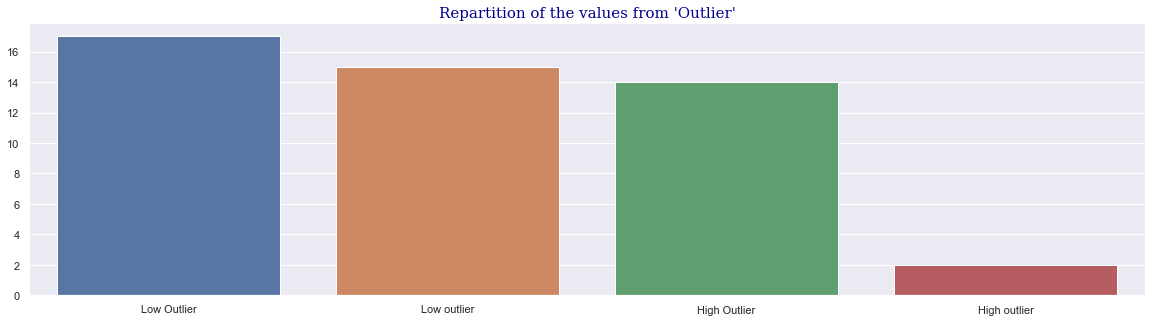

In [36]:
non_outliers = data['Outlier'].isna().sum()
print("Number of non-outliers : ", non_outliers)
print("Proportion of identified outliers : ", (data.shape[0]-non_outliers)/data.shape[0])

import seaborn as sns
import matplotlib.pyplot as plt
count_categories = data['Outlier'].value_counts()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=count_categories.index, y=count_categories.values)
plt.title("Repartition of the values from 'Outlier'", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 15})
plt.show()

As the proportion of identified outliers is very low (about 1%), we are just going to cut them off :

In [37]:
print("Shape of data before transformation is ",data.shape)

class Remove_outliers(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Remove_outliers")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_ = X_[X_['Outlier'].isna()==True]
        X_.drop(columns=['Outlier'], inplace=True)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf3_remove_outliers = Remove_outliers()

tf3_remove_outliers.fit(data)

data = tf3_remove_outliers.transform(data)
    
print("New shape of data is ",data.shape)


Shape of data before transformation is  (3318, 44)
Going through Remove_outliers
Shape of data at this point :  (3318, 44)
New shape of data is  (3270, 43)


#### Next thing we have to check is the feature 'ComplianceStatus' :

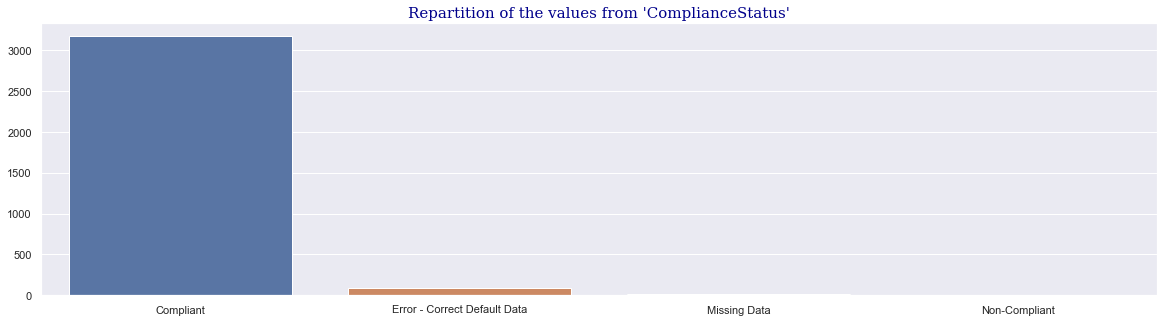

In [38]:
count_categories = data['ComplianceStatus'].value_counts()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x=count_categories.index, y=count_categories.values)
plt.title("Repartition of the values from 'ComplianceStatus'", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 15})
plt.show()

As we can see above, a very few amount of data hasn't its status as 'Compliant'. We are just going to keep the data 'Compliant' :

In [39]:
print("Shape of data before transformation is ", data.shape)

class Remove_non_compliant(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Remove_non_compliant")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_ = X_[X_['ComplianceStatus']=='Compliant']
        X_.drop(columns=['ComplianceStatus'], inplace=True)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf4_remove_non_compliant = Remove_non_compliant()

tf4_remove_non_compliant.fit(data)

data = tf4_remove_non_compliant.transform(data)
    
print("New shape of data is ", data.shape)


Shape of data before transformation is  (3270, 43)
Going through Remove_non_compliant
Shape of data at this point :  (3270, 43)
New shape of data is  (3167, 42)


#### Then, we can explore 'TotalGHGEmissions' and 'SiteEnergyUse(kBtu)' or 'SiteEnergyUseWN(kBtu)' which would be the target features :

count     3162.000000
mean       180.940806
std        680.378998
min         -0.800000
25%         20.065000
50%         49.270000
75%        139.470000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

count    3.162000e+03
mean     8.245188e+06
std      2.577174e+07
min      0.000000e+00
25%      1.241540e+06
50%      2.601657e+06
75%      7.007220e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

count    3.161000e+03
mean     8.154522e+06
std      2.108518e+07
min      0.000000e+00
25%      1.343671e+06
50%      2.761760e+06
75%      7.339108e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64


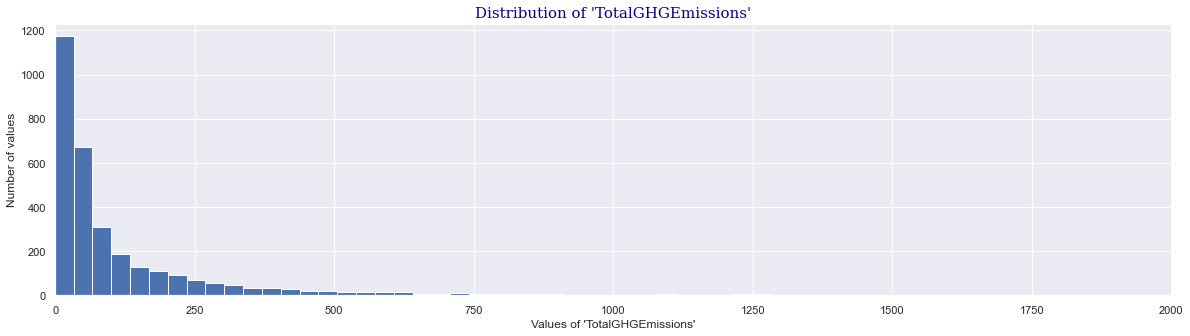

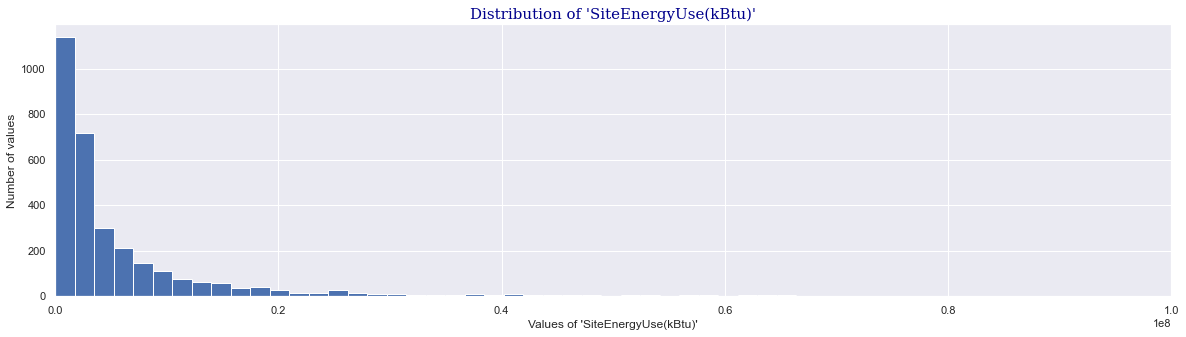

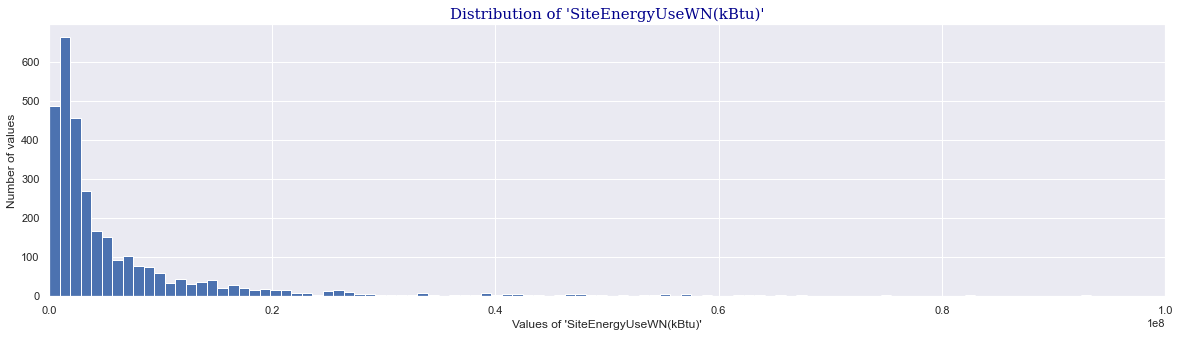

In [40]:
import matplotlib.pyplot as plt

print(data['TotalGHGEmissions'].describe())
print('')
print(data['SiteEnergyUse(kBtu)'].describe())
print('')
print(data['SiteEnergyUseWN(kBtu)'].describe())


data['TotalGHGEmissions'].hist(bins=500)
plt.xlabel("Values of 'TotalGHGEmissions'", size = 12)
plt.ylabel("Number of values", size = 12)
plt.title("Distribution of 'TotalGHGEmissions'", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 15})
plt.xlim([0, 2E3])
plt.show()

data['SiteEnergyUse(kBtu)'].hist(bins=500)
plt.xlabel("Values of 'SiteEnergyUse(kBtu)'", size = 12)
plt.ylabel("Number of values", size = 12)
plt.title("Distribution of 'SiteEnergyUse(kBtu)'", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 15})
plt.xlim([0, 1E8])
plt.show()

data['SiteEnergyUseWN(kBtu)'].hist(bins=500)
plt.xlabel("Values of 'SiteEnergyUseWN(kBtu)'", size = 12)
plt.ylabel("Number of values", size = 12)
plt.title("Distribution of 'SiteEnergyUseWN(kBtu)'", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 15})
plt.xlim([0, 1E8])
plt.show()


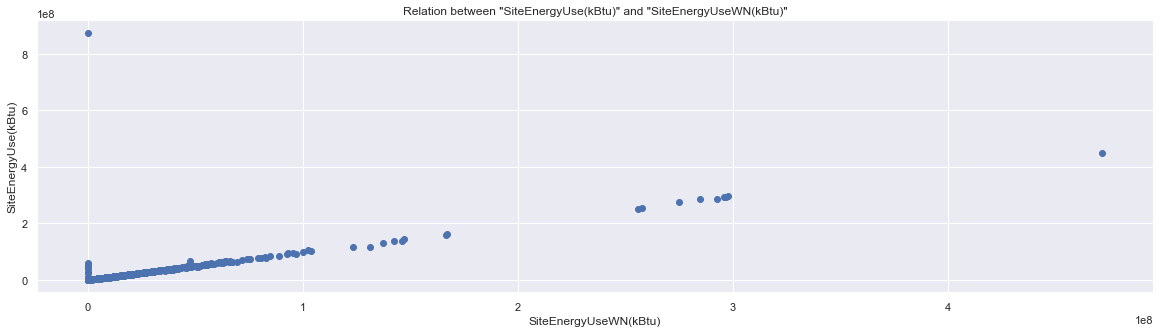

Coefficient de Pearson :  (0.7939381662861345, 0.0)


In [41]:
# Showing the correlation between 'SiteEnergyUse(kBtu)' and 'SiteEnergyUseWN(kBtu)' :
plt.title('Relation between "SiteEnergyUse(kBtu)" and "SiteEnergyUseWN(kBtu)"')
plt.xlabel('SiteEnergyUseWN(kBtu)')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.scatter(data['SiteEnergyUseWN(kBtu)'], data['SiteEnergyUse(kBtu)'])
plt.show()

from scipy.stats import pearsonr
data_bis = data[~data['SiteEnergyUseWN(kBtu)'].isna()] # to correctly calculate the Pearson coefficient
data_bis = data_bis[~data_bis['SiteEnergyUse(kBtu)'].isna()]
corr = pearsonr(data_bis['SiteEnergyUseWN(kBtu)'], data_bis['SiteEnergyUse(kBtu)'])
print("Coefficient de Pearson : ",corr)

#### To take action against risks of data leakage, we have to put aside the features which suppose the use of other data than the ones we get on declarative data of the business license of buildings (size and use of the buildings, mention of recent work, date of construction...) : all 'Weather Normalized' (with 'WN' suffix) features as well as 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', NaturalGas(therms)', 'NaturalGas(kBtu)' and 'GHGEmissionsIntensity' :

In [42]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(k

In [43]:
# Removing of all feature with risk of data leak :

print("Shape of data before transformation is ", data.shape)

class Drop_dataleak_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Drop_dataleak_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.drop(columns=['SiteEUI(kBtu/sf)', 
                        'SiteEUIWN(kBtu/sf)', 
                        'SourceEUI(kBtu/sf)', 
                        'SourceEUIWN(kBtu/sf)', 
                        'SiteEnergyUseWN(kBtu)', 
                        'SteamUse(kBtu)', 
                        'Electricity(kWh)', 
                        'Electricity(kBtu)', 
                        'NaturalGas(therms)', 
                        'NaturalGas(kBtu)',
                        'GHGEmissionsIntensity'], 
                inplace=True)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf5_Drop_dataleak_features = Drop_dataleak_features()

tf5_Drop_dataleak_features.fit(data)

data = tf5_Drop_dataleak_features.transform(data)
    
print("New shape of data is ", data.shape)

data.dtypes

Shape of data before transformation is  (3167, 42)
Going through Drop_dataleak_features
Shape of data at this point :  (3167, 42)
New shape of data is  (3167, 31)


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
TotalGHGEmi

#### Let's have a look at the features which stand :

In [44]:
for col in data.columns:
    print('')
    print("There are ",len(data[col].unique())," unique values for ",col)
    print(data[col].unique()[0:20])
    print('')
    print('- '*30)


There are  1684  unique values for  OSEBuildingID
[ 1  2  3  8  9 10 11 12 15 16 17 18 19 21 22 23 24 25 26 27]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  2  unique values for  DataYear
[2015 2016]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  5  unique values for  BuildingType
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  29  unique values for  PrimaryPropertyType
['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'College/University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility\n'
 'Distribution Center' 'Large Office' 'Retail Store'
 'Senior Care Community' 'Medical Office' 'Hospital'
 'Residence Hall/Dormitory' 'Non-Refrigerated Warehouse'
 'Distribution Center\n' 'SPS-District K-12' 'Worship Facility'
 'Supermarket/Grocery Store' 'Laboratory']

- - - - - - - - - - - - - - - - - - - - - - - - - - -

 '-122.33163032' '-122.3320576' '-122.33052826' '-122.32830048']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  2974  unique values for  Address
['405 OLIVE WAY' '724 PINE ST' '1900 5TH AVE' '401 LENORA ST'
 '810 VIRGINIA ST' '1619 9TH AVE' '901 PINE ST' '612 2ND AVE'
 '1101 4TH AVE' '1112 4TH AVE' '400 SPRING ST' '1113 6TH AVE'
 '1100 5TH AVE' '1000 4TH AVE' '909 4TH AVE' '515 MADISON ST'
 '810 4TH AVE' '700 3RD AVE' '516 3RD AVE' '500 5TH AVE']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  2  unique values for  City
['SEATTLE' 'Seattle']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  1  unique values for  State
['WA']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  49  unique values for  ZipCode
[98101. 98121. 98104. 98118. 98105. 98112. 98125. 98109. 98103. 98199.
 98115. 98107. 98144. 98119. 98122. 98126. 98133. 98106. 98108. 98134.]

- - - - - - - - - - - - - - - - - - - - -

#### We are going to lower letters of all textual features to homogenize text values :

In [45]:
print("Shape of data before transformation is ", data.shape)

class Lower_textual_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Lower_textual_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        textual_features = ['BuildingType',
                            'PrimaryPropertyType', 
                            'PropertyName', 
                            'Neighborhood', 
                            'ListOfAllPropertyUseTypes', 
                            'LargestPropertyUseType', 
                            'SecondLargestPropertyUseType', 
                            'ThirdLargestPropertyUseType', 
                            'Address', 
                            'City']

        def lower_case(value): 
            return(value.lower())
        for feature in textual_features:
            X_[feature] = X_[feature].astype('str')
            X_[feature] = X_[feature].apply(lower_case)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf6_Lower_textual_features = Lower_textual_features()

tf6_Lower_textual_features.fit(data)

data = tf6_Lower_textual_features.transform(data)
    
print("New shape of data is ", data.shape)


Shape of data before transformation is  (3167, 31)
Going through Lower_textual_features
Shape of data at this point :  (3167, 31)
New shape of data is  (3167, 31)


In [46]:
for col in data.columns:
    print('')
    print("There are ",len(data[col].unique())," unique values for ",col)
    print(data[col].unique()[0:20])
    print('')
    print('- '*30)


There are  1684  unique values for  OSEBuildingID
[ 1  2  3  8  9 10 11 12 15 16 17 18 19 21 22 23 24 25 26 27]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  2  unique values for  DataYear
[2015 2016]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  5  unique values for  BuildingType
['nonresidential' 'nonresidential cos' 'sps-district k-12' 'campus'
 'nonresidential wa']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

There are  29  unique values for  PrimaryPropertyType
['hotel' 'other' 'mixed use property' 'k-12 school' 'college/university'
 'small- and mid-sized office' 'self-storage facility\n'
 'distribution center' 'large office' 'retail store'
 'senior care community' 'medical office' 'hospital'
 'residence hall/dormitory' 'non-refrigerated warehouse'
 'distribution center\n' 'sps-district k-12' 'worship facility'
 'supermarket/grocery store' 'laboratory']

- - - - - - - - - - - - - - - - - - - - - - - - - - -

#### As we can see, there is still at least 3 obvious features which will not give any useful information for predicting emissions or energy use of the buildings :
- 'OSEBuildingID' : just an identification number
- 'City' : because every building would be in the same (Seattle)
- 'State' : for the same reason as 'City' 

We are going to delete these unuseful features :

In [47]:
print("Shape of data before transformation is ", data.shape)

class Remove_unuseful_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Remove_unuseful_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.drop(columns=['OSEBuildingID', 'City', 'State'], inplace=True)
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf7_Remove_unuseful_features = Remove_unuseful_features()

tf7_Remove_unuseful_features.fit(data)

data = tf7_Remove_unuseful_features.transform(data)
    
print("New shape of data is ", data.shape)

data.dtypes

Shape of data before transformation is  (3167, 31)
Going through Remove_unuseful_features
Shape of data at this point :  (3167, 31)
New shape of data is  (3167, 28)


DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SiteEnergyUse(kBtu)                float64
TotalGHGEmissions                  float64
DefaultData

## Before making specific treatments for numerical and categorical data, we are going to encapsulate all of the above treatments into a pipeline :

In [48]:
from sklearn.pipeline import Pipeline, make_pipeline

first_general_steps_pipeline = make_pipeline(Select_building_types(),
                                            Remove_nan_features(),
                                            Remove_outliers(),
                                            Remove_non_compliant(),
                                            Drop_dataleak_features(),
                                            Lower_textual_features(),
                                            Remove_unuseful_features())

## Advanced feature selection for modelling by statistic analysis

In order to build a prediction model for emissions and energy use, we are firstly going to test the statistical link between each qualitative feature and 'SiteEnergyUse(kBtu)' by an ANOVA where the null hypothesis means the absence of difference in the values of 'SiteEnergyUse(kBtu)' between the classes :

In [49]:
## Realisation of ANOVA on qualitative features and SiteEnergyUse(kBtu) :

import statsmodels.formula.api
import statsmodels.api

# Arrangement of name :

print("Shape of data before 1st transformation is ", data.shape)

class Renaming_SiteEnergyUse(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Renaming_SiteEnergyUse")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.rename(columns={'SiteEnergyUse(kBtu)':'SiteEnergyUse'}, inplace=True) 
        # rename the feature to avoid '(' characters
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf8_Renaming_SiteEnergyUse = Renaming_SiteEnergyUse()

tf8_Renaming_SiteEnergyUse.fit(data)

data = tf8_Renaming_SiteEnergyUse.transform(data)
    
print("New shape of data is ", data.shape)


# Removing non-categorical qualitative features & false qualitative features :

print("Shape of data before 2nd transformation is ", data.shape)

class Removing_noncateg_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Removing_noncateg_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.drop(columns={'PropertyName',
                        'Address',
                        'TaxParcelIdentificationNumber',
                        'ListOfAllPropertyUseTypes',
                        'Latitude',
                        'Longitude'}, 
                inplace=True) 
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

tf9_Removing_noncateg_features = Removing_noncateg_features()

tf9_Removing_noncateg_features.fit(data)

data = tf9_Removing_noncateg_features.transform(data)
    
print("New shape of data is ", data.shape)

# Tests :

qualitative_features = list(data.select_dtypes("object").columns)

for var in qualitative_features:
    # Creation of the parameter of the function .ols of type 'SiteEnergyUse ~ var' :
    param_names = 'SiteEnergyUse ~ ' + var

    # Génération du modèle de régression linéaire et fit() :
    fit = statsmodels.formula.api.ols(param_names, data = data).fit()

    # Affichage des résultats :
    table = statsmodels.api.stats.anova_lm(fit)
    print('')
    print("ANOVA between 'SiteEnergyUse' and ", var)
    print('')
    print(table)
    print('- '*50)
    print(fit.summary())
    print('')
    print('- '*50)

Shape of data before 1st transformation is  (3167, 28)
Going through Renaming_SiteEnergyUse
Shape of data at this point :  (3167, 28)
New shape of data is  (3167, 28)
Shape of data before 2nd transformation is  (3167, 28)
Going through Removing_noncateg_features
Shape of data at this point :  (3167, 28)
New shape of data is  (3167, 22)

ANOVA between 'SiteEnergyUse' and  BuildingType

                  df        sum_sq       mean_sq          F        PR(>F)
BuildingType     4.0  1.221914e+17  3.054785e+16  48.773598  7.263035e-40
Residual      3157.0  1.977290e+18  6.263194e+14        NaN           NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:


ANOVA between 'SiteEnergyUse' and  LargestPropertyUseType

                            df        sum_sq       mean_sq          F  \
LargestPropertyUseType    56.0  5.141033e+17  9.180416e+15  17.736175   
Residual                3036.0  1.571463e+18  5.176097e+14        NaN   

                               PR(>F)  
LargestPropertyUseType  9.463645e-146  
Residual                          NaN  
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     17.74
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          9.46e-146
Time:                        11:02:43   Log-Likelihood:                -56756.
No. Observations:        

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.864
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.06e-09
Time:                        11:02:44   Log-Likelihood:                -30150.
No. Observations:                1637   AIC:                         6.039e+04
Df Residuals:                    1590   BIC:                         6.065e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

The precedent tests permit to exclude the following qualitative features to have a statistical link with 'SiteEnergyUse', as the null hypothesis could not have been rejected :
- DefaultData

For the following qualitative features, instead, the null hypothestis could not have been rejected since the p-value associated was too low (<5%): they will be used for trying to predict values of 'SiteEnergyUse' :
- BuildingType
- PrimaryPropertyType
- Neighborhood
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType

In [50]:
qualitative_features_kept = ['BuildingType', 
                            'PrimaryPropertyType', 
                            'Neighborhood', 
                            'LargestPropertyUseType', 
                            'SecondLargestPropertyUseType', 
                            'ThirdLargestPropertyUseType']

We are now going to proceed to the same test on the link between the qualitative features and 'TotalGHGEmissions' :

In [51]:
# Tests :
for var in qualitative_features:
    # Creation of the parameter of the function .ols of type 'SiteEnergyUse ~ var' :
    param_names = 'TotalGHGEmissions ~ ' + var

    # Génération du modèle de régression linéaire et fit() :
    fit = statsmodels.formula.api.ols(param_names, data = data).fit()

    # Affichage des résultats :
    table = statsmodels.api.stats.anova_lm(fit)
    print('')
    print("ANOVA between 'TotalGHGEmissions' and ", var)
    print('')
    print(table)
    print('- '*50)
    print(fit.summary())
    print('')
    print('- '*50)


ANOVA between 'TotalGHGEmissions' and  BuildingType

                  df        sum_sq       mean_sq          F        PR(>F)
BuildingType     4.0  7.031677e+07  1.757919e+07  39.841443  1.333387e-32
Residual      3157.0  1.392959e+09  4.412288e+05        NaN           NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     39.84
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.33e-32
Time:                        11:02:44   Log-Likelihood:                -25033.
No. Observations:                3162   AIC:                         5.008e+04
Df Residuals:                    3157   BIC:                         5


ANOVA between 'TotalGHGEmissions' and  Neighborhood

                  df        sum_sq       mean_sq         F        PR(>F)
Neighborhood    13.0  3.104077e+07  2.387751e+06  5.248188  2.199121e-09
Residual      3148.0  1.432235e+09  4.549668e+05       NaN           NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.248
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           2.20e-09
Time:                        11:02:44   Log-Likelihood:                -25077.
No. Observations:                3162   AIC:                         5.018e+04
Df Residuals:                    3148   BIC:                         5.02

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.847
Date:                Tue, 12 Apr 2022   Prob (F-statistic):            0.00160
Time:                        11:02:45   Log-Likelihood:                -5371.0
No. Observations:                 675   AIC:                         1.082e+04
Df Residuals:                     635   BIC:                         1.100e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

**These tests with 'TotalGHGEmissions' give the same selection of interesting features than for 'SiteEnergyUse'.**

We have put aside some qualitative features, not directly useful to our prediction model but which still sould be useful to it with some others processing steps. We keep them in a special list :

In [52]:
qualitative_features_aside = ['Address', 
                              'PropertyName', 
                              'Latitude', 
                              'Longitude', 
                              'ListOfAllPropertyUseTypes', 
                              'TaxParcelIdentificationNumber']

#### Between the other features, all numerical, we have non-ratio numerical features : 'ZipCode', 'DataYear', 'CouncilDistrictCode ' and 'YearBuilt' which we can all define as categorical data as well.

These non-ration numerical features would be tested as categorical features, as the ones before :

In [53]:
numerical_categorical_features = ['ZipCode', 'DataYear', 'CouncilDistrictCode', 'YearBuilt']

# Tests with 'SiteEnergyUse':
for var in numerical_categorical_features:
    # Transforming into categorical data
    data[var] = data[var].astype("category")
    # Creation of the parameter of the function .ols of type 'SiteEnergyUse ~ var' :
    param_names = 'SiteEnergyUse ~ ' + var

    # Génération du modèle de régression linéaire et fit() :
    fit = statsmodels.formula.api.ols(param_names, data = data).fit()

    # Affichage des résultats :
    table = statsmodels.api.stats.anova_lm(fit)
    print('')
    print("ANOVA between 'SiteEnergyUse' and ", var)
    print('')
    print(table)
    print('- '*50)
    print(fit.summary())
    print('')
    print('- '*50)


ANOVA between 'SiteEnergyUse' and  ZipCode

              df        sum_sq       mean_sq         F    PR(>F)
ZipCode     47.0  6.221555e+16  1.323735e+15  2.015459  0.000056
Residual  3101.0  2.036709e+18  6.567909e+14       NaN       NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           5.65e-05
Time:                        11:02:45   Log-Likelihood:                -58163.
No. Observations:                3149   AIC:                         1.164e+05
Df Residuals:                    3101   BIC:                         1.167e+05
Df Model:                  


ANOVA between 'SiteEnergyUse' and  YearBuilt

               df        sum_sq       mean_sq         F    PR(>F)
YearBuilt   112.0  1.064094e+17  9.500835e+14  1.453437  0.001558
Residual   3049.0  1.993072e+18  6.536807e+14       NaN       NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.453
Date:                Tue, 12 Apr 2022   Prob (F-statistic):            0.00156
Time:                        11:02:45   Log-Likelihood:                -58363.
No. Observations:                3162   AIC:                         1.170e+05
Df Residuals:                    3049   BIC:                         1.176e+05
Df Model:             

In [54]:
# Tests with 'TotalGHGEmissions':
for var in numerical_categorical_features:
    # Transforming into categorical data
    data[var] = data[var].astype("category")
    # Creation of the parameter of the function .ols of type 'SiteEnergyUse ~ var' :
    param_names = 'TotalGHGEmissions ~ ' + var

    # Génération du modèle de régression linéaire et fit() :
    fit = statsmodels.formula.api.ols(param_names, data = data).fit()

    # Affichage des résultats :
    table = statsmodels.api.stats.anova_lm(fit)
    print('')
    print("ANOVA between 'TotalGHGEmissions' and ", var)
    print('')
    print(table)
    print('- '*50)
    print(fit.summary())
    print('')
    print('- '*50)


ANOVA between 'TotalGHGEmissions' and  ZipCode

              df        sum_sq        mean_sq         F    PR(>F)
ZipCode     47.0  3.042323e+07  647302.715200  1.401144  0.037444
Residual  3101.0  1.432605e+09  461981.542629       NaN       NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.401
Date:                Tue, 12 Apr 2022   Prob (F-statistic):             0.0374
Time:                        11:02:45   Log-Likelihood:                -24981.
No. Observations:                3149   AIC:                         5.006e+04
Df Residuals:                    3101   BIC:                         5.035e+04
Df Model:           


ANOVA between 'TotalGHGEmissions' and  YearBuilt

               df        sum_sq        mean_sq         F    PR(>F)
YearBuilt   112.0  8.558238e+07  764128.408521  1.691107  0.000011
Residual   3049.0  1.377694e+09  451851.023677       NaN       NaN
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.691
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.13e-05
Time:                        11:02:46   Log-Likelihood:                -25016.
No. Observations:                3162   AIC:                         5.026e+04
Df Residuals:                    3049   BIC:                         5.094e+04
Df Model:      

Both tests above give the same selection results too : 'CouncilDistrictCode', 'ZipCode' and 'YearBuilt' seem to have a significant statistical link with both 'SiteEnergyUse' and 'TotalGHGEmissions' meanwhile 'DataYear' would be unuseful as expected. 

In [55]:
useful_num_categorical_features = ['CouncilDistrictCode', 'ZipCode', 'YearBuilt']

#### Next step is to check the relation between all numerical ratio features and the target features :

In [56]:
numerical_features = list(data.columns[data.dtypes == float]) + list(data.columns[data.dtypes == 'int64'])

print(numerical_features)

['NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse', 'TotalGHGEmissions', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)']


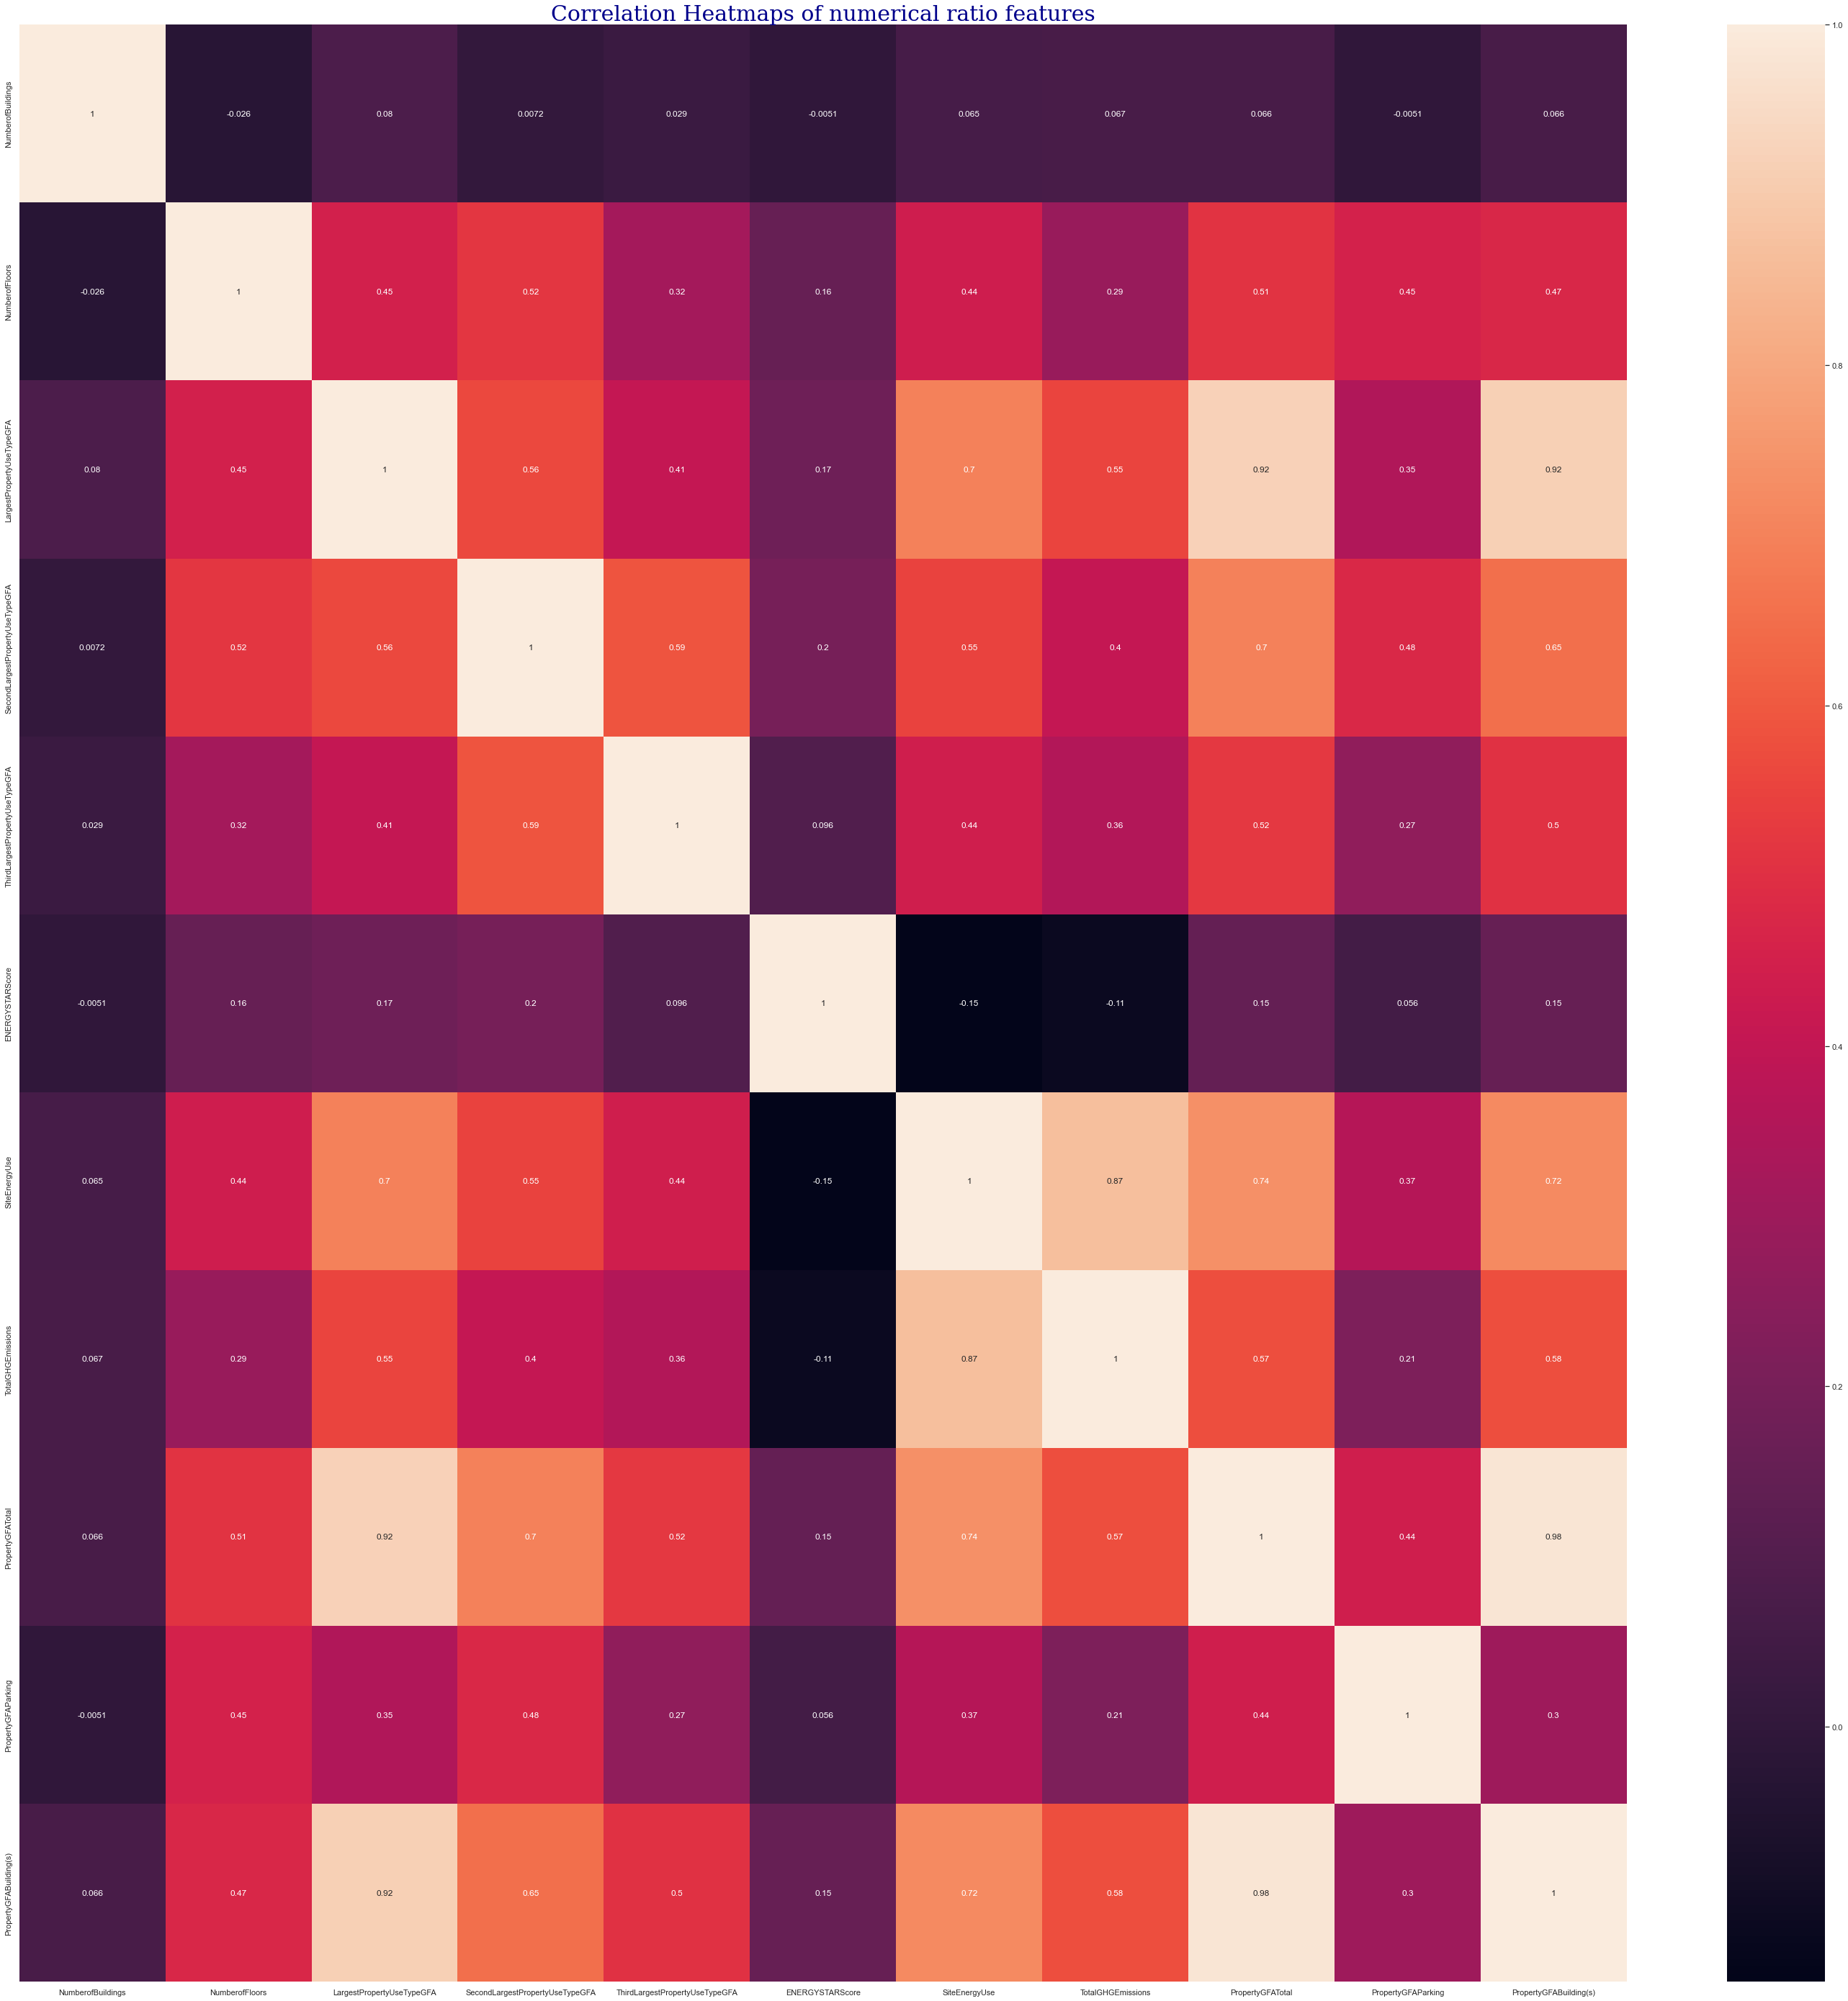

In [57]:
# Printing the correlation heatmap between numerical_features & target features :

plt.figure(figsize=(50,50))
corr_data = data[numerical_features].corr(method='spearman')

sns.heatmap(corr_data, annot=True)
plt.title("Correlation Heatmaps of numerical ratio features", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'size': 30})
plt.show()

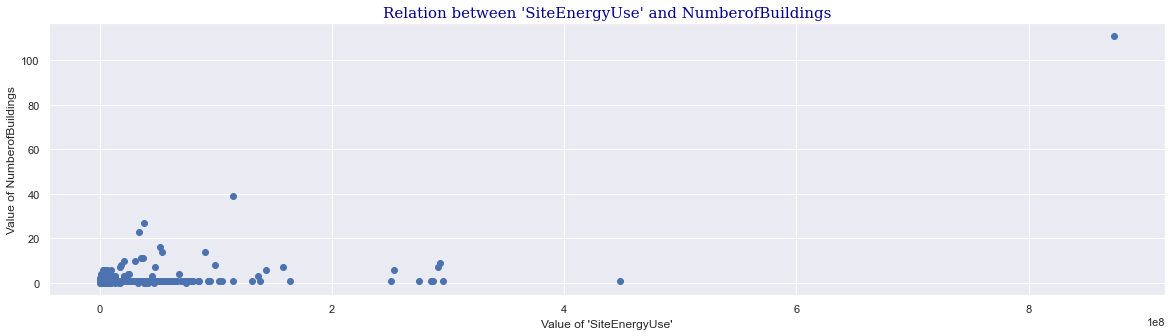

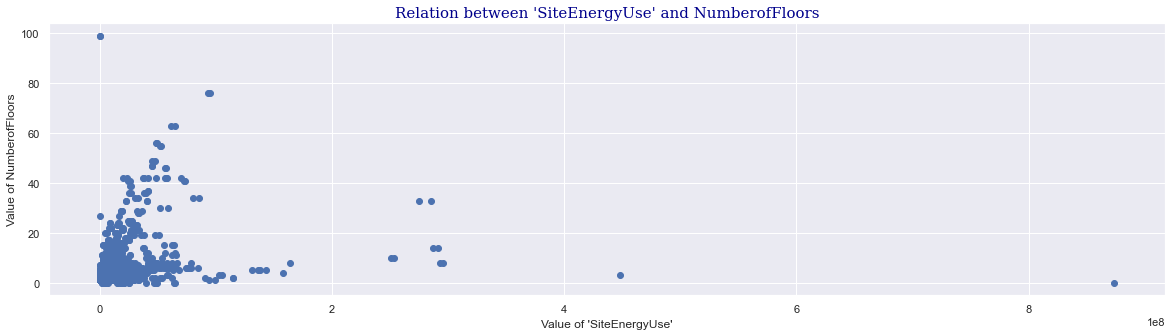

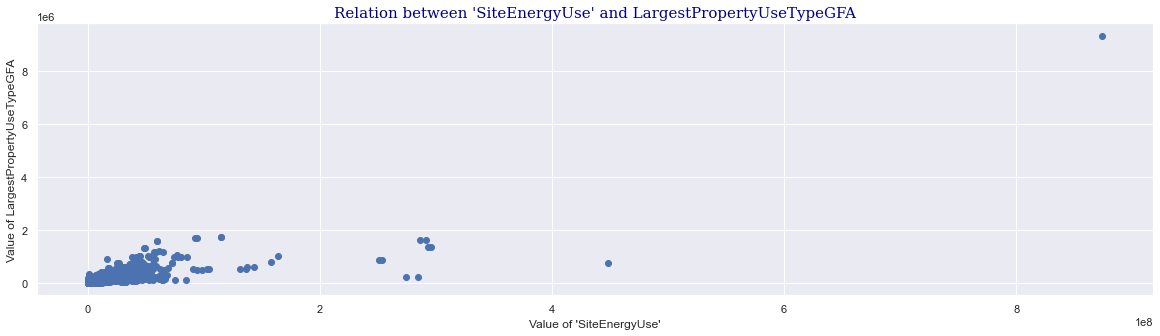

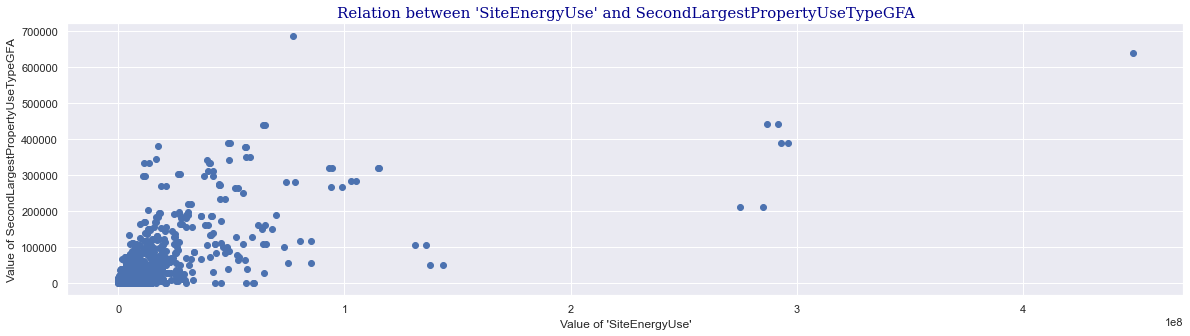

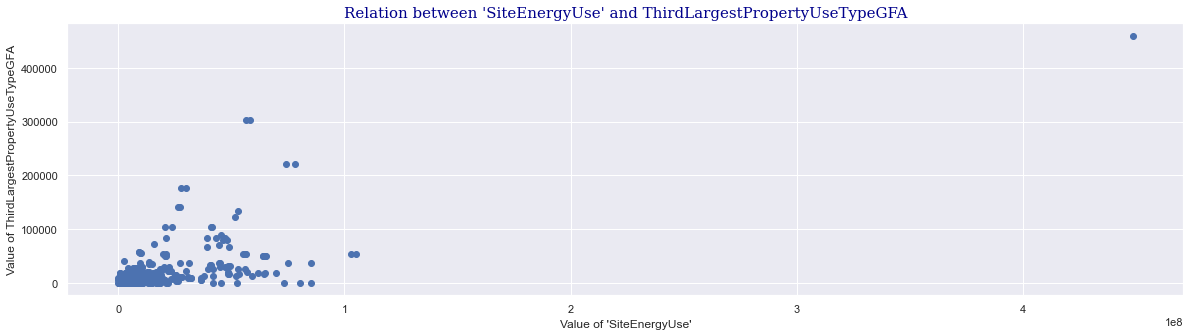

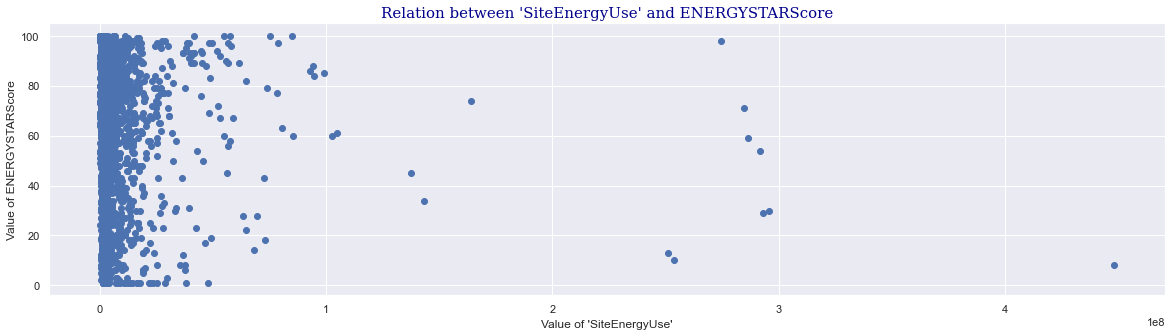

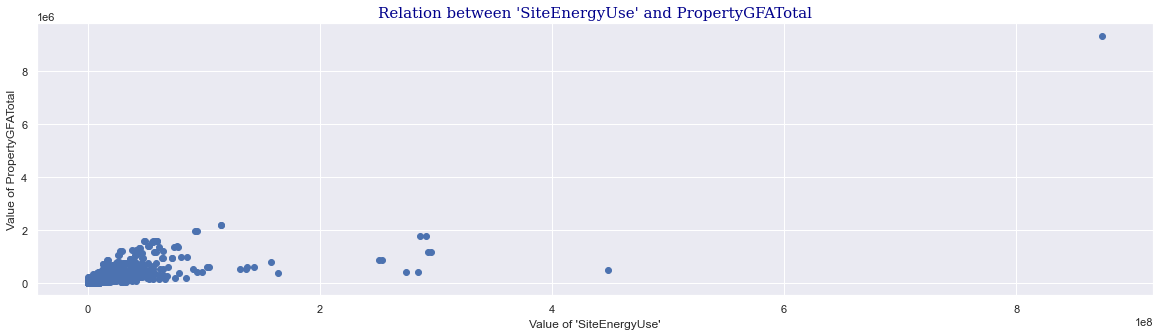

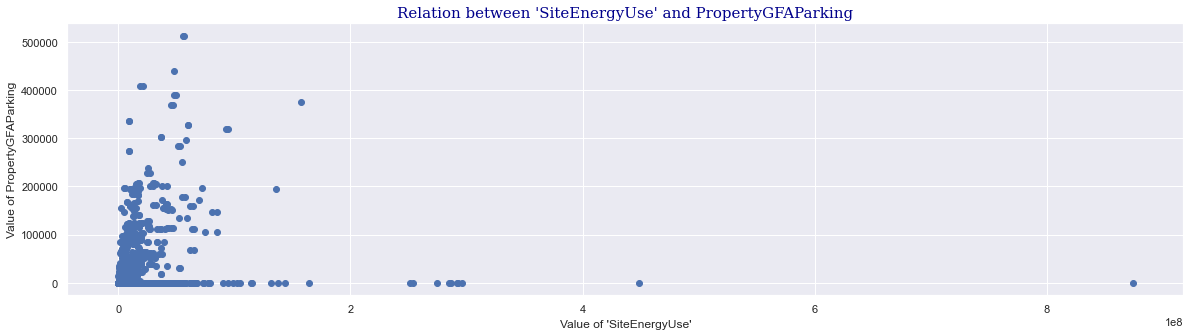

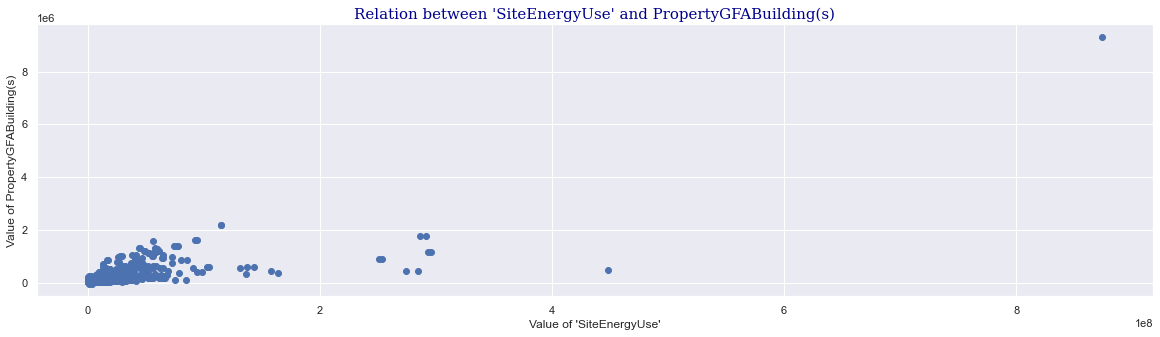

In [58]:
# Showing relations between each numerical feature and 'SiteEnergyUse' :
numerical_features.remove("SiteEnergyUse")
numerical_features.remove('TotalGHGEmissions')

for feat in numerical_features:
    plt.xlabel("Value of 'SiteEnergyUse'", size = 12)
    plt.ylabel("Value of "+feat, size = 12)
    title = "Relation between 'SiteEnergyUse' and "+feat
    plt.title(title, 
              fontdict={'family': 'serif', 
                        'color' : 'darkblue',
                        'size': 15})
    plt.scatter(data['SiteEnergyUse'], data[feat])
    plt.show()

This heatmap shows interesting relations between these features : we are going to put aside 'NumberofBuildings' and 'ENERGYStarScore' which don't seem to be relevant to predict the target features, based on the above graphs and heatmap :

In [59]:
num_features_kept = numerical_features

num_features_kept.remove('NumberofBuildings')
num_features_kept.remove('ENERGYSTARScore')

print(num_features_kept)

['NumberofFloors', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)']


#### Placing all selection steps into a transformer :

In [60]:
print("The shape of data before transformartion is : ", data.shape)

class Removing_unselected_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Removing_unselected_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_.drop(columns={'DataYear',
                        'DefaultData',
                        'NumberofBuildings',
                        'ENERGYSTARScore'}, 
                inplace=True) 
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)
    
tf_Removing_unselected_features = Removing_unselected_features()

tf_Removing_unselected_features.fit(data)

data = tf_Removing_unselected_features.transform(data)

print("The shape of data after transformartion is : ", data.shape)

The shape of data before transformartion is :  (3167, 22)
Going through Removing_unselected_features
Shape of data at this point :  (3167, 22)
The shape of data after transformartion is :  (3167, 18)


#### For future use in pipelines, we are going to create a new feature 'to_drop' to allow dropping processing in parallels pipelines by just marking the rows to drop when in a parallel pipeline and then drop them when the pipelines are reunited :

In [61]:
print("The shape of data before transformartion is : ", data.shape)

class Adding_to_drop_feature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Adding_to_drop_feature")
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['to_drop'] = 0  
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)
    
tf_Adding_to_drop_feature = Adding_to_drop_feature()

tf_Adding_to_drop_feature.fit(data)

data = tf_Adding_to_drop_feature.transform(data)

print("The shape of data after transformartion is : ", data.shape)

The shape of data before transformartion is :  (3167, 18)
Going through Adding_to_drop_feature
The shape of data after transformartion is :  (3167, 19)


## Concatenation of the above steps into a pipeline :

In [62]:
second_general_steps_pipeline = make_pipeline(Renaming_SiteEnergyUse(),
                                              Removing_noncateg_features(),
                                              Removing_unselected_features())

## One of the last step before modelling would be to address the issue of missing values : we are going to split this process into 3 pipelines : 
- A pipeline for categorical features : handling errors + handling missing values + encoding
- A pipeline for numerical categorical data : handling missing values + encoding 
- A pipeline for numerical features : handling missing values + scaling

Then we will regroup them into a unique pipeline.

### Categorical pipeline :

In [63]:
# Selecting categorical features :

categorical_features =  list(data.columns[data.dtypes == 'object'])

# Checking textual errors and the number and proportion of missing values for each feature kept to this point :

for feature in categorical_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique())
    print('')
    print('- '*30)


BuildingType
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  5
Exemples de valeurs :  ['nonresidential' 'nonresidential cos' 'sps-district k-12' 'campus'
 'nonresidential wa']

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
PrimaryPropertyType
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  29
Exemples de valeurs :  ['hotel' 'other' 'mixed use property' 'k-12 school' 'college/university'
 'small- and mid-sized office' 'self-storage facility\n'
 'distribution center' 'large office' 'retail store'
 'senior care community' 'medical office' 'hospital'
 'residence hall/dormitory' 'non-refrigerated warehouse'
 'distribution center\n' 'sps-district k-12' 'worship facility'
 'supermarket/grocery store' 'laboratory' 'self-storage facility'
 'refrigerated warehouse' 'restaurant\n' 'low-rise multifamily'
 'restaurant' 'university' 'warehouse' 'residence hall'
 'supermark

We can make the following observations :
- There isn't any error or missing value in 'BuildingType'
- There are some typo errors in 'PrimaryPropertyType' with seome values with a '\n' to delete
- There isn't any error or missing value in 'Neighborhood'
- There isn't any error or missing value in 'LargestPropertyUseType'
- There are missing values named 'nan' in 'SecondLargestPropertyUseType' (but logical if only 1 property use type)
- There are missing values named 'nan' in 'ThirdLargestPropertyUseType' (but logical if only 1 or 2 property use type(s))

In [64]:
# Handling typo errors in 'PrimaryPropertyType' :

data['PrimaryPropertyType'].value_counts()

small- and mid-sized office    569
other                          497
large office                   330
mixed use property             219
non-refrigerated warehouse     187
warehouse                      185
k-12 school                    184
retail store                   181
hotel                          146
worship facility               141
medical office                  82
distribution center             55
distribution center\n           51
supermarket / grocery store     40
senior care community           39
supermarket/grocery store       36
self-storage facility           29
self-storage facility\n         27
refrigerated warehouse          25
university                      24
college/university              21
residence hall                  21
hospital                        20
residence hall/dormitory        15
restaurant                      13
restaurant\n                    11
laboratory                      11
sps-district k-12                4
low-rise multifamily

In [65]:
import re

print("The shape of data before transformartion is : ", data.shape)

class Handling_typo_errors(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Handling_typo_errors")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        regex = re.compile(r'[\n\r\t]')
        X_['PrimaryPropertyType'] = [regex.sub("", item) for index, item in X_.PrimaryPropertyType.iteritems()]
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)
    
tf_Handling_typo_errors = Handling_typo_errors()

tf_Handling_typo_errors.fit(data)

data = tf_Handling_typo_errors.transform(data)

print("The shape of data after transformartion is : ", data.shape)

data['PrimaryPropertyType'].value_counts()

The shape of data before transformartion is :  (3167, 19)
Going through Handling_typo_errors
Shape of data at this point :  (3167, 19)
The shape of data after transformartion is :  (3167, 19)


small- and mid-sized office    569
other                          497
large office                   330
mixed use property             219
non-refrigerated warehouse     187
warehouse                      185
k-12 school                    184
retail store                   181
hotel                          146
worship facility               141
distribution center            106
medical office                  82
self-storage facility           56
supermarket / grocery store     40
senior care community           39
supermarket/grocery store       36
refrigerated warehouse          25
restaurant                      24
university                      24
college/university              21
residence hall                  21
hospital                        20
residence hall/dormitory        15
laboratory                      11
sps-district k-12                4
low-rise multifamily             4
Name: PrimaryPropertyType, dtype: int64

In [66]:
# A class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        print("Going through DataFrameSelector")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        self.features = list(X.columns)
        return X[self.attribute_names]
    def get_feature_names_out(self, input_features=None):
        feature_names = self.attribute_names
        return np.asarray(feature_names, dtype=object)

# Pipeline for categorical data with encoding and a default imputer to handle any missing value in the test set :
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer

# SimpleImputer does not have a get_feature_names_out, so we need to add it manually:
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)


categorical_data_pipeline = Pipeline([("select_cat", DataFrameSelector(["BuildingType", 
                                                                       "PrimaryPropertyType", 
                                                                       "Neighborhood", 
                                                                       "LargestPropertyUseType", 
                                                                       "SecondLargestPropertyUseType", 
                                                                       "ThirdLargestPropertyUseType"])),
                                     ("typo_error_handler", Handling_typo_errors()),
                                     ("imputer", SimpleImputer(strategy='most_frequent')),
                                     ("cat_encoder", OneHotEncoder(sparse=False))])

### Numerical categorical pipeline :

In [67]:
# Checking errors and the number and proportion of missing values for each numerical categorical feature kept to this point :

for feature in useful_num_categorical_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique())
    print('')
    print('- '*30)

CouncilDistrictCode
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  7
Exemples de valeurs :  [7, 3, 2, 4, 5, 6, 1]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ZipCode
Nombre de valeurs manquantes :  13
Proportion de valeurs manquantes :  0.4 %
Nombre de valeurs uniques :  49
Exemples de valeurs :  [98101.0, 98121.0, 98104.0, 98118.0, 98105.0, ..., 98011.0, 98113.0, 98020.0, 98145.0, NaN]
Length: 49
Categories (48, float64): [98006.0, 98011.0, 98013.0, 98020.0, ..., 98185.0, 98191.0, 98195.0, 98199.0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
YearBuilt
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  113
Exemples de valeurs :  [1927, 1996, 1969, 1980, 1999, ..., 1901, 1936, 1935, 2014, 2015]
Length: 113
Categories (113, int64): [1900, 1901, 1902, 1903, ..., 2012, 2013, 2014, 2015]

- - - - - - 

C:\Users\may81\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


As the proportion of missing values in 'ZipCode' is very low, we will just drop them :

In [68]:
class Handling_nan_ZipCode(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Handling_nan_ZipCode")
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        for i in X_.index:
            if math.isnan(X_['ZipCode'][i])==True:
                X_['to_drop'][i] = 1
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [69]:
print("Taille initiale du dataset : ", data.shape)

tf = Handling_nan_ZipCode()

tf.fit(data)

data = tf.transform(data)

print("Taille post-transformation du dataset : ", data.shape)
print('')

for feature in useful_num_categorical_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique())
    print('')
    print('- '*30)


Taille initiale du dataset :  (3167, 19)
Going through Handling_nan_ZipCode
Taille post-transformation du dataset :  (3167, 19)

CouncilDistrictCode
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  7
Exemples de valeurs :  [7, 3, 2, 4, 5, 6, 1]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ZipCode
Nombre de valeurs manquantes :  13
Proportion de valeurs manquantes :  0.4 %
Nombre de valeurs uniques :  49
Exemples de valeurs :  [98101.0, 98121.0, 98104.0, 98118.0, 98105.0, ..., 98011.0, 98113.0, 98020.0, 98145.0, NaN]
Length: 49
Categories (48, float64): [98006.0, 98011.0, 98013.0, 98020.0, ..., 98185.0, 98191.0, 98195.0, 98199.0]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
YearBuilt
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  113
Exemples de valeurs :  [1927, 1996, 1969, 1980, 1999, ..., 1901,

C:\Users\may81\AppData\Local\Temp/ipykernel_35232/3860328576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['to_drop'][i] = 1


#### Before making a pipeline we need to change the type of this data to encode them :

In [70]:
class Changing_type(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Changing_type")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['ZipCode'] = X_['ZipCode'].astype('category')
        X_['CouncilDistrictCode'] = X_['CouncilDistrictCode'].astype('category')
        X_['YearBuilt'] = X_['YearBuilt'].astype('category')
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

#### Building the pipeline for numerical categorical data :

In [71]:
# Pipeline for numerical categorical data with encoding and a default imputer to handle any missing value in the test set :

num_categorical_data_pipeline = Pipeline([("select_cat", DataFrameSelector(["ZipCode", 
                                                                            "CouncilDistrictCode",
                                                                            "YearBuilt"])),
                                          ("changing_type", Changing_type()),
                                          ("imputer", SimpleImputer(strategy='most_frequent'))])

### Numerical pipeline

In [72]:

for feature in numerical_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique()[:20])
    print('')
    print('- '*30)

NumberofFloors
Nombre de valeurs manquantes :  8
Proportion de valeurs manquantes :  0.3 %
Nombre de valeurs uniques :  46
Exemples de valeurs :  [12. 11. 41. 18.  2.  8. 15. 25.  9. 33.  6. 28.  5. 10. 19.  7.  1.  3.
  4. 24.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
LargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  69
Proportion de valeurs manquantes :  2.2 %
Nombre de valeurs uniques :  1658
Exemples de valeurs :  [ 88434.  83880. 757243. 123445.  88830.  81352. 102761. 163984.     nan
 336640.  65009. 295511. 364913.  90000. 348329.  16442. 537150. 385274.
  58320.  58006.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SecondLargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  1529
Proportion de valeurs manquantes :  48.3 %
Nombre de valeurs uniques :  751
Exemples de valeurs :  [    nan  15064. 100000.  68009.  57600.  49000.  40000.  85000.  15505.
  30586.  42000.  18153.  39314.   7849.  28197.  65676.  13028.   4993.
  23500. 

#### First thing to do here : drop the 8 missing values in 'NumberofFloors':

In [73]:
class Drop_nan_NumberofFloors(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Drop_nan_NumberofFloors")
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        for i in X_.index:
            if math.isnan(X_['NumberofFloors'][i])==True:
                X_['to_drop'][i] = 1
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [74]:
print("Taille initiale du dataset : ", data.shape)

transfo = Drop_nan_NumberofFloors()

transfo.fit(data)

data = transfo.transform(data)

print("Taille post-transformation du dataset : ", data.shape)
print('')


for feature in numerical_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique()[:20])
    print('')
    print('- '*30)

Taille initiale du dataset :  (3167, 19)
Going through Drop_nan_NumberofFloors
Taille post-transformation du dataset :  (3167, 19)

NumberofFloors
Nombre de valeurs manquantes :  8
Proportion de valeurs manquantes :  0.3 %
Nombre de valeurs uniques :  46
Exemples de valeurs :  [12. 11. 41. 18.  2.  8. 15. 25.  9. 33.  6. 28.  5. 10. 19.  7.  1.  3.
  4. 24.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
LargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  69
Proportion de valeurs manquantes :  2.2 %
Nombre de valeurs uniques :  1658
Exemples de valeurs :  [ 88434.  83880. 757243. 123445.  88830.  81352. 102761. 163984.     nan
 336640.  65009. 295511. 364913.  90000. 348329.  16442. 537150. 385274.
  58320.  58006.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SecondLargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  1529
Proportion de valeurs manquantes :  48.3 %
Nombre de valeurs uniques :  751
Exemples de valeurs :  [    nan  15064. 100000

C:\Users\may81\AppData\Local\Temp/ipykernel_35232/210848902.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['to_drop'][i] = 1


Other missing values concern GFA features : 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA' and 'ThirdLargestPropertyUseTypeGFA'.

We can check the correspondance between having a 'NaN' value in 'SecondLargestPropertyUseTypeGFA' and having 'nan' in 'SecondLargestPropertyUseType' and the same for 'ThirdLargestPropertyUseTypeGFA' and 'ThirdLargestPropertyUseType' :

In [75]:
import math

incoherence = []

for i in data.index:
    if math.isnan(data["SecondLargestPropertyUseTypeGFA"][i]) == True:
        if data["SecondLargestPropertyUseType"][i] != 'nan':
            incoherence.append(i)
    elif math.isnan(data["ThirdLargestPropertyUseTypeGFA"][i]) == True:
        if data["ThirdLargestPropertyUseType"][i] != 'nan':
            incoherence.append(i)

print(len(incoherence), incoherence)

0 []


This test shows there is no 'nan' value is 'SecondLargestPropertyUseTypeGFA' which is coherent with a nan value in 'SecondLargestPropertyUseType' and the same for 'ThirdLargestPropertyUseTypeGFA' and 'ThirdLargestPropertyUseType'.

This means that we are going to impute 'nan' values from both GFA features as 0 :

In [76]:
GFA_features = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

class Custom_GFA_imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Custom_GFA_imputer")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        for i in X_.index:
            if math.isnan(X_["SecondLargestPropertyUseTypeGFA"][i])==True:
                X_["SecondLargestPropertyUseTypeGFA"][i] = 0
            if math.isnan(X_["ThirdLargestPropertyUseTypeGFA"][i])==True:
                X_["ThirdLargestPropertyUseTypeGFA"][i] = 0
        
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [77]:
print("The shape of data before transformation is : ", data.shape)

data_b = data.copy()

Custom_imputer = Custom_GFA_imputer()

Custom_imputer.fit(data_b)

data_b = Custom_imputer.transform(data_b)

print("The shape of data after transformation is : ", data.shape)

The shape of data before transformation is :  (3167, 19)
Going through Custom_GFA_imputer
Shape of data at this point :  (3167, 19)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["SecondLargestPropertyUseTypeGFA"][i] = 0
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["ThirdLargestPropertyUseTypeGFA"][i] = 0


The shape of data after transformation is :  (3167, 19)


In [78]:
Custom_imputer.get_feature_names_out()

array(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUse', 'TotalGHGEmissions', 'ZipCode', 'to_drop'],
      dtype=object)

In [79]:
print("The shape of data before transformartion is : ", data.shape)

Custom_imputer = Custom_GFA_imputer()

Custom_imputer.fit(data)

data = Custom_imputer.transform(data)

print("The shape of data after transformartion is : ", data.shape)

The shape of data before transformartion is :  (3167, 19)
Going through Custom_GFA_imputer
Shape of data at this point :  (3167, 19)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["SecondLargestPropertyUseTypeGFA"][i] = 0
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["ThirdLargestPropertyUseTypeGFA"][i] = 0


The shape of data after transformartion is :  (3167, 19)


In [80]:
for feature in GFA_features:
    print(feature)
    print("Nombre de valeurs manquantes : ", data[feature].isna().sum())
    print("Proportion de valeurs manquantes : ", np.round(data[feature].isna().sum()/data.shape[0]*100, 1),'%')
    print("Nombre de valeurs uniques : ", len(data[feature].unique()))
    print("Exemples de valeurs : ", data[feature].unique()[:20])
    print('')
    print('- '*30)

LargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  69
Proportion de valeurs manquantes :  2.2 %
Nombre de valeurs uniques :  1658
Exemples de valeurs :  [ 88434.  83880. 757243. 123445.  88830.  81352. 102761. 163984.     nan
 336640.  65009. 295511. 364913.  90000. 348329.  16442. 537150. 385274.
  58320.  58006.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
SecondLargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  750
Exemples de valeurs :  [     0.  15064. 100000.  68009.  57600.  49000.  40000.  85000.  15505.
  30586.  42000.  18153.  39314.   7849.  28197.  65676.  13028.   4993.
  23500.  10043.]

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
ThirdLargestPropertyUseTypeGFA
Nombre de valeurs manquantes :  0
Proportion de valeurs manquantes :  0.0 %
Nombre de valeurs uniques :  324
Exemples de valeurs :  [    0.  4622.  1074.  9741.  4500.  4307.  3859.   354.  978

In [81]:
print("Current shape of data : ", data.shape)

Current shape of data :  (3167, 19)


#### Concatenation into a pipeline :

In [82]:
# Pipeline for numerical features with scaling and a default imputer to handle any missing value in the test set :

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

numerical_data_pipeline = Pipeline([("select_num", DataFrameSelector(["NumberofFloors", 
                                                                      "LargestPropertyUseTypeGFA",
                                                                      "SecondLargestPropertyUseTypeGFA",
                                                                      "ThirdLargestPropertyUseTypeGFA",
                                                                      "PropertyGFATotal",
                                                                      "PropertyGFAParking",
                                                                      "PropertyGFABuilding(s)"])),
                                          ("Custom_imputer", Custom_GFA_imputer()),
                                          ("imputer", SimpleImputer(strategy='median')),
                                          ("StandardScaler", StandardScaler()),
                                          ("MinMaxScaler", MinMaxScaler())])

#### Pipeline for target features (to deal with precedently removed rows and their own nan values) :

In [83]:
pipeline_targets = Pipeline([("select_targets", DataFrameSelector(["SiteEnergyUse", "TotalGHGEmissions"])),      
                            ("target_imputer", SimpleImputer(strategy='median'))])

## Joint of pipelines :

In [84]:
from sklearn.pipeline import FeatureUnion, make_union

split_pipeline = FeatureUnion(transformer_list=[("categorical_data_pipeline", categorical_data_pipeline), 
                                                ("num_categorical_data_pipeline", num_categorical_data_pipeline), 
                                                ("numerical_data_pipeline", numerical_data_pipeline),
                                                ("targets_pipeline", pipeline_targets)])

## Creating the complete pipeline :

In [85]:
from sklearn.pipeline import make_pipeline

preprocess_pipeline = make_pipeline(first_general_steps_pipeline,
                                    second_general_steps_pipeline,
                                    split_pipeline)

In [86]:
preprocess_pipeline.fit(concatenated_data)

preprocessed_data = preprocess_pipeline.transform(concatenated_data)

Going through Select_building_types
Shape of data at this point :  (6716, 46)
Going through Remove_nan_features
Shape of data at this point :  (3318, 46)
Going through Remove_outliers
Shape of data at this point :  (3318, 44)
Going through Remove_non_compliant
Shape of data at this point :  (3270, 43)
Going through Drop_dataleak_features
Shape of data at this point :  (3167, 42)
Going through Lower_textual_features
Shape of data at this point :  (3167, 31)
Going through Remove_unuseful_features
Shape of data at this point :  (3167, 31)
Going through Renaming_SiteEnergyUse
Shape of data at this point :  (3167, 28)
Going through Removing_noncateg_features
Shape of data at this point :  (3167, 28)
Going through Removing_unselected_features
Shape of data at this point :  (3167, 22)
Going through DataFrameSelector
Shape of data at this point :  (3167, 18)
Going through Handling_typo_errors
Shape of data at this point :  (3167, 6)
Going through DataFrameSelector
Shape of data at this point :

C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["SecondLargestPropertyUseTypeGFA"][i] = 0
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["ThirdLargestPropertyUseTypeGFA"][i] = 0


Going through DataFrameSelector
Shape of data at this point :  (3167, 18)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["SecondLargestPropertyUseTypeGFA"][i] = 0
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["ThirdLargestPropertyUseTypeGFA"][i] = 0


In [87]:
preprocessed_data.shape

(3167, 204)

### Creation of the target features :

In [88]:
# Transforming output into a dataframe :

postpipeline_data = pd.DataFrame(preprocessed_data, columns=list(preprocess_pipeline.get_feature_names_out()))

postpipeline_data.head()

,categorical_data_pipeline__BuildingType_campus,categorical_data_pipeline__BuildingType_nonresidential,categorical_data_pipeline__BuildingType_nonresidential cos,categorical_data_pipeline__BuildingType_nonresidential wa,categorical_data_pipeline__BuildingType_sps-district k-12,categorical_data_pipeline__PrimaryPropertyType_college/university,categorical_data_pipeline__PrimaryPropertyType_distribution center,categorical_data_pipeline__PrimaryPropertyType_hospital,categorical_data_pipeline__PrimaryPropertyType_hotel,categorical_data_pipeline__PrimaryPropertyType_k-12 school,...,num_categorical_data_pipeline__YearBuilt,numerical_data_pipeline__NumberofFloors,numerical_data_pipeline__LargestPropertyUseTypeGFA,numerical_data_pipeline__SecondLargestPropertyUseTypeGFA,numerical_data_pipeline__ThirdLargestPropertyUseTypeGFA,numerical_data_pipeline__PropertyGFATotal,numerical_data_pipeline__PropertyGFAParking,numerical_data_pipeline__PropertyGFABuilding(s),targets_pipeline__SiteEnergyUse,targets_pipeline__TotalGHGEmissions
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1927.0,0.121212,0.008887,0.000000,0.000000,0.008288,0.000004,0.014832,6981428.0,249.43
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1996.0,0.111111,0.008398,0.021935,0.010053,0.009913,0.029391,0.014839,8354235.0,263.51
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1969.0,0.414141,0.080690,0.145613,0.000000,0.102129,0.000004,0.108054,73130656.0,2061.48
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1980.0,0.181818,0.012646,0.099030,0.000000,0.011667,0.024311,0.016859,14829099.0,507.70
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1999.0,0.020202,0.008930,0.000000,0.000000,0.009239,0.072570,0.011807,12051984.0,304.62


In [89]:
postpipeline_data['targets_pipeline__SiteEnergyUse'].mean()

8236278.367118864

In [90]:
postpipeline_data['targets_pipeline__TotalGHGEmissions'].mean()

180.73292706030898

**Before removing target features from input features, we use them to split our dataset in a train set and a test set : we are going to use the StratifiedShuffleSplit() method from scikit-learn split train and test sets stratified for each target feature to be sure to conserve a representative set of data regarding both target features :**

To do that, we need first to create a qualitative feature representing each target feature :

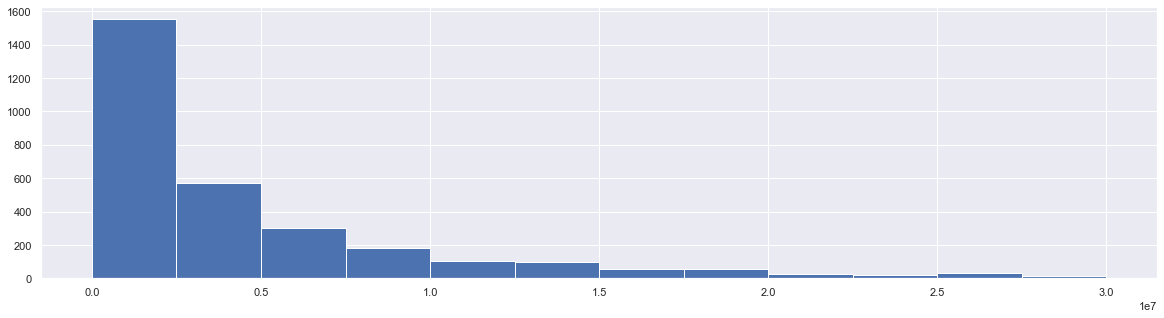

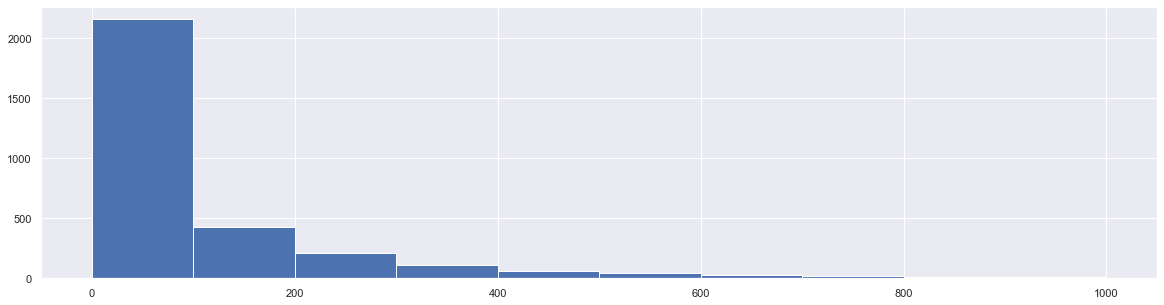

In [91]:
# Distribution of 'SiteEnergyUse' :
plt.hist(postpipeline_data['targets_pipeline__SiteEnergyUse'], bins = 12, range=(0, 3E7))
plt.show()

# Distribution of 'TotalGHGEmissions' :
plt.hist(postpipeline_data['targets_pipeline__TotalGHGEmissions'], bins = 10, range=(0, 1000))
plt.show()

In [92]:
# Creation of the qualitative features from target features :

postpipeline_data['categ_SiteEnergyUse'] = pd.cut(postpipeline_data['targets_pipeline__SiteEnergyUse'], 
                                                  bins=[-1, 2.5E6, 5E6, 7.5E6, 1E7, 1.25E7, 1.5E7, 1.75E7, 2E7, 2.25E7,
                                                          2.5E7, 2.75E7, 3E7, np.inf],
                                                  labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

postpipeline_data['categ_TotalGHGEmissions'] = pd.cut(postpipeline_data['targets_pipeline__TotalGHGEmissions'], 
                                                      bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, np.inf],
                                                      labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<AxesSubplot:>

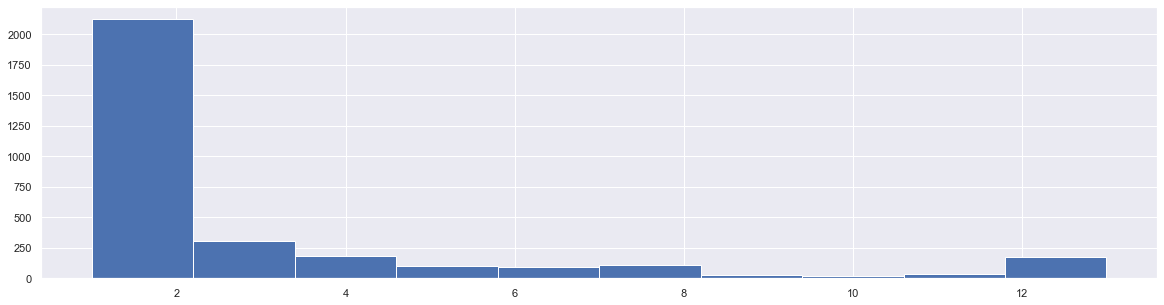

In [93]:
postpipeline_data['categ_SiteEnergyUse'].hist()

<AxesSubplot:>

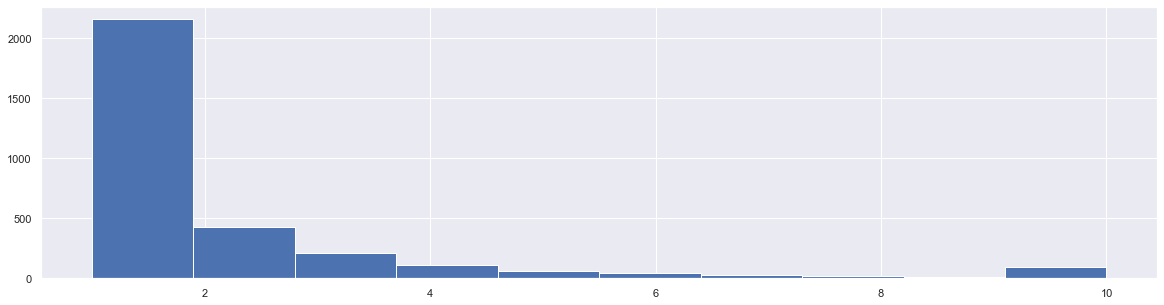

In [94]:
postpipeline_data['categ_TotalGHGEmissions'].hist()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

# for 'SiteEnergyUse' :

dataset_split_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_1, test_index_1 in dataset_split_1.split(postpipeline_data, postpipeline_data['categ_SiteEnergyUse']):
    train_set_1_BL = postpipeline_data.loc[train_index_1]
    test_set_1_BL = postpipeline_data.loc[test_index_1]
    
# for 'TotalGHGEmissions' :

dataset_split_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_2, test_index_2 in dataset_split_2.split(postpipeline_data, postpipeline_data['categ_TotalGHGEmissions']):
    train_set_2_BL = postpipeline_data.loc[train_index_2]
    test_set_2_BL = postpipeline_data.loc[test_index_2]

Last step before modelling : split input features and target features from train and test sets :

In [96]:
X1_train_BL = train_set_1_BL.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X1_test_BL = test_set_1_BL.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_train_BL = train_set_2_BL.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_test_BL = test_set_2_BL.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

In [97]:
y1_train_BL = train_set_1_BL['targets_pipeline__SiteEnergyUse']

y1_test_BL = test_set_1_BL['targets_pipeline__SiteEnergyUse']

y2_train_BL = train_set_2_BL['targets_pipeline__TotalGHGEmissions']

y2_test_BL = test_set_2_BL['targets_pipeline__TotalGHGEmissions']

In [98]:
X1_test_BL.shape

(634, 202)

In [99]:
X1_train_BL.shape

(2533, 202)

# Baselines :

#### Baseline for 'SiteEnergyUse(kBtu)' :

Visualization of the effects of train_test_split() on the distribution of the target :

<AxesSubplot:>

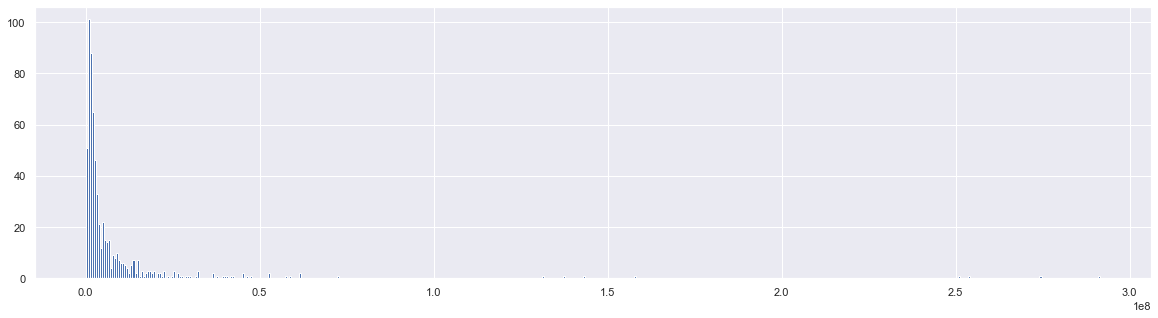

In [100]:
y1_test_BL.hist(bins=500)

<AxesSubplot:>

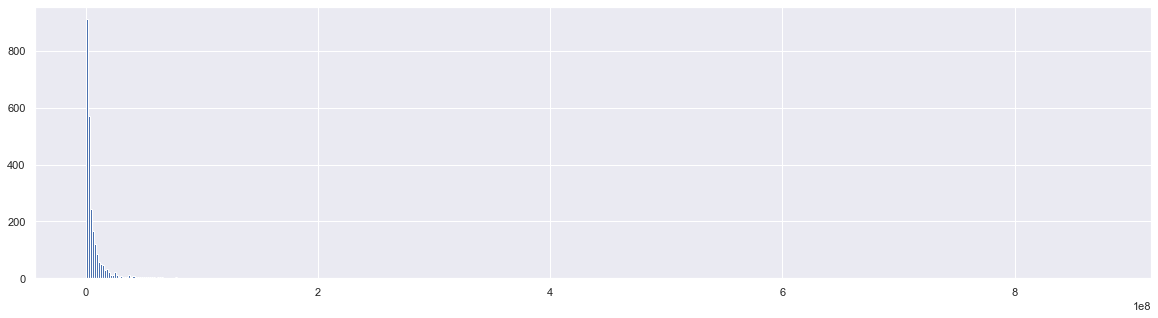

In [101]:
y1_train_BL.hist(bins=500)

In [102]:
y1_test_BL.describe()

count    6.340000e+02
mean     8.717634e+06
std      2.526761e+07
min      8.282400e+04
25%      1.271918e+06
50%      2.582821e+06
75%      6.782017e+06
max      2.916144e+08
Name: targets_pipeline__SiteEnergyUse, dtype: float64

In [103]:
y1_train_BL.describe()

count    2.533000e+03
mean     8.115797e+06
std      2.587579e+07
min      0.000000e+00
25%      1.228041e+06
50%      2.601657e+06
75%      7.070998e+06
max      8.739237e+08
Name: targets_pipeline__SiteEnergyUse, dtype: float64

In [104]:
# Imports for modelling :
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [105]:
### Creation of a baseline model :

BL1 = linear_model.Lasso()

# Fitting it on train set :
BL1.fit(X1_train_BL, y1_train_BL)


C:\Users\may81\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.450e+16, tolerance: 1.695e+14
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [106]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y1_pred_BL = BL1.predict(X1_test_BL)

RMSE_Baseline_EnergyUse = np.format_float_scientific(np.sqrt(mean_squared_error(y1_test_BL, y1_pred_BL)))
MAE_Baseline_EnergyUse = np.format_float_scientific(mean_absolute_error(y1_test_BL, y1_pred_BL))
R2_Baseline_EnergyUse = r2_score(y1_test_BL, y1_pred_BL)

print("Performances of this baseline model :")
print('')
print("RMSE between y1_test_BL and y1_pred_BL : ", RMSE_Baseline_EnergyUse)
print("MAE between y1_test_BL and y1_pred_BL : ", MAE_Baseline_EnergyUse)
print("R² between y1_test_BL and y1_pred_BL : ", R2_Baseline_EnergyUse)
print('')
print("Reminder of the mean of this target : ", np.format_float_scientific(y1_test_BL.mean()))

Performances of this baseline model :

RMSE between y1_test_BL and y1_pred_BL :  1.4928682367008055e+07
MAE between y1_test_BL and y1_pred_BL :  5.8450003170222165e+06
R² between y1_test_BL and y1_pred_BL :  0.6503769029942598

Reminder of the mean of this target :  8.71763356659227e+06


### Baseline for 'TotalGHGEmissions' :

In [107]:
### Creation of a baseline model :

BL2 = linear_model.Lasso()

# Fitting it on train set :
BL2.fit(X2_train_BL, y2_train_BL)


Lasso()

In [108]:
y2_pred_BL = BL2.predict(X2_test_BL)

RMSE_Baseline_Emissions = np.format_float_scientific(np.sqrt(mean_squared_error(y2_test_BL, y2_pred_BL)))
MAE_Baseline_Emissions = np.format_float_scientific(mean_absolute_error(y2_test_BL, y2_pred_BL))
R2_Baseline_Emissions = r2_score(y2_test_BL, y2_pred_BL)

print("Performances of this baseline model :")
print('')
print("RMSE between y2_test_BL and y2_pred_BL : ", RMSE_Baseline_Emissions)
print("MAE between y2_test_BL and y2_pred_BL : ", MAE_Baseline_Emissions)
print("R² between y2_test_BL and y2_pred_BL : ", R2_Baseline_Emissions)
print('')
print("Reminder of the mean of this target : ", np.format_float_scientific(y2_test_BL.mean()))

Performances of this baseline model :

RMSE between y2_test_BL and y2_pred_BL :  3.4480264961187584e+02
MAE between y2_test_BL and y2_pred_BL :  1.5086355186338338e+02
R² between y2_test_BL and y2_pred_BL :  0.5796323475156633

Reminder of the mean of this target :  1.6351458990536278e+02


# Additional Feature Engineering

To improve performances of our future models, we are firstly going to engineer some new features and see their impact on the performances of the baselines.

In [109]:
# Features kept in outputs of the complete pipeline :

categorical_features_kept = ["BuildingType", 
                             "PrimaryPropertyType", 
                             "Neighborhood", 
                             "LargestPropertyUseType", 
                             "SecondLargestPropertyUseType", 
                             "ThirdLargestPropertyUseType"]

numerical_categorical_features_kept = ["ZipCode", 
                                       "CouncilDistrictCode",
                                       "YearBuilt"]

numerical_features_kept = ["NumberofFloors", 
                           "LargestPropertyUseTypeGFA",
                           "SecondLargestPropertyUseTypeGFA",
                           "ThirdLargestPropertyUseTypeGFA",
                           "PropertyGFATotal",
                           "PropertyGFAParking",
                           "PropertyGFABuilding(s)"]

features_kept = categorical_features_kept + numerical_categorical_features_kept + numerical_features_kept

In [110]:
concatenated_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

### Engineered features #1 and #2 :
From the features still present in concatenated_data, we can find an interesting information for both target features : the nature of energy used with 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)'.

These features have firstly been removed since our goal is to not use any consumption information to predict 'TotalGHGEmissions' of 'SiteEnergyUse'. But we can use at least the information of which type of energy is used by a building, which is very likely to be accessible on commercial lease.

We are going to generate two binary features from the 4 precedently listed ones : 'UseElectricity' and 'UseNaturalGas' defined as whether or not electricity and natural gas are used by a building :

In [111]:
def binary_use(x):
    if math.isnan(x)==True:
        y = 0
    elif x==0:
        y = 0
    else:
        y = 1
    return(y)

class Creation_new_energy_sources_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Creation_new_energy_sources_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['UseElectricity'] = X_['Electricity(kWh)'].apply(binary_use)
        X_['UseNaturalGas'] = X_['NaturalGas(kBtu)'].apply(binary_use)           
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [112]:
# Test :
df = concatenated_data.copy()

tf = Creation_new_energy_sources_features()

tf.fit(df)

new_df = tf.transform(df)

new_df.head(20)

Going through Creation_new_energy_sources_features
Shape of data at this point :  (6716, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,UseElectricity,UseNaturalGas
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101.0,1,1
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101.0,1,1
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101.0,1,1
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101.0,1,1
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121.0,1,1
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1.0,...,Compliant,NaN,47.6164389,-122.33676431,810 VIRGINIA ST,SEATTLE,WA,98101.0,1,1
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,...,Compliant,NaN,47.6141141,-122.33274086,1619 9TH AVE,SEATTLE,WA,98101.0,1,1
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1.0,...,Compliant,NaN,47.61290234,-122.33130949,901 PINE ST,SEATTLE,WA,98101.0,1,1
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1.0,...,Compliant,NaN,47.60258934,-122.33255325,612 2ND AVE,SEATTLE,WA,98104.0,1,1
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,939000105,7,DOWNTOWN,1910,1.0,...,Compliant,NaN,47.60278416,-122.33214887,607 3RD AVE,SEATTLE,WA,98104.0,1,1


To integrate this step into the pipeline, we must do it before the Drop_dataleak_features() transformer step and integrate it into a new 'first_general_steps_pipeline'.

### Engineered features #3 and #4 :
To have something which may 'approach' a thermal resistance of a building, we are going to create a feature consisting of a simple ratio between the GFA of the building(s) and its number of floors and another similar feature consisting of a ratio between the GFA of the building(s) and the number of buildings :

In [113]:
class Creation_thermal_resistance_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Creation_thermal_resistance_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['thermal_resistance_approach_1'] = 0
        X_['thermal_resistance_approach_2'] = 0
        for i in X_.index:
            if math.isnan(X_['NumberofFloors'][i])==False:
                if X_['NumberofFloors'][i]==0:
                    X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'].mean()/X_['NumberofFloors'].mean()
                else:
                    X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofFloors'][i]
            elif math.isnan(X_['NumberofFloors'][i])==True:
                X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'].mean()/X_['NumberofFloors'].mean()
            if math.isnan(X_['NumberofBuildings'][i])==False:
                if X_['NumberofBuildings'][i]==0:
                    X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'].mean()/X_['NumberofBuildings'].mean()
                else:
                    X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofBuildings'][i] 
            elif math.isnan(X_['NumberofBuildings'][i])==True:
                X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'].mean()/X_['NumberofBuildings'].mean()
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [114]:
# Test :
df = concatenated_data.copy()

tf = Creation_thermal_resistance_features()

tf.fit(df)

new_df = tf.transform(df)

new_df.head()

Going through Creation_thermal_resistance_features
Shape of data at this point :  (6716, 46)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofFloors'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofBuildings'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,thermal_resistance_approach_1,thermal_resistance_approach_2
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101.0,7369,88434
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101.0,8045,88502
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101.0,23463,961990
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101.0,6132,61320
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121.0,5968,107430


### Engineered feature #5 :

As we didn't use both 'Latitude' and 'Longitude' features yet, we are going to create a new feature which may capture some variance from geographical place a bit better : the distance between the building and a reference, the center of the city here which is located at Latitude 47.6129432 and Longitude -122.482147 taking the GPS coordinates from Google Maps.

In [115]:
class Creation_distance_features(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        print("Going through Creation_distance_features")
        print("Shape of data at this point : ", X.shape)
        return self
    def transform(self, X):
        X_ = X.copy(deep=True)
        X_['distance'] = 0
        for i in X_.index:
            X_['distance'][i] = np.sqrt(((float(X_['Longitude'][i])*10E8)**2)+((float(X_['Latitude'][i])*10E8)**2))
        self.features = list(X_.columns)
        return X_
    def get_feature_names_out(self, input_features=None):
        feature_names = self.features
        return np.asarray(feature_names, dtype=object)

In [116]:
# Test :
df = concatenated_data.copy()

tf = Creation_distance_features()

tf.fit(df)

new_df = tf.transform(df)

new_df.head()

Going through Creation_distance_features
Shape of data at this point :  (6716, 46)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/3717058458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['distance'][i] = np.sqrt(((float(X_['Longitude'][i])*10E8)**2)+((float(X_['Latitude'][i])*10E8)**2))


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,distance
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101.0,131276449822
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101.0,131272457959
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101.0,131276592370
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101.0,131275890496
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121.0,131279744226


### Integration of these steps of feature engineering in a new pipeline :

As these steps require the use of some deleted pipelines, these steps will be integrated in new 'first_general_steps_pipeline' :

In [117]:
new_first_general_steps_pipeline = make_pipeline(Select_building_types(),
                                                 Remove_nan_features(),
                                                 Remove_outliers(),
                                                 Remove_non_compliant(),
                                                 Creation_new_energy_sources_features(),
                                                 Creation_thermal_resistance_features(),
                                                 Creation_distance_features(),
                                                 Drop_dataleak_features(),
                                                 Lower_textual_features(),
                                                 Remove_unuseful_features())

For the parallel processings, we are going to integrate the two binary features into a new parallel pipeline and the others into a new numerical pipeline :

In [118]:
binary_data_pipeline = Pipeline([("select_binary", DataFrameSelector(["UseNaturalGas", 
                                                                      "UseElectricity"]))])

new_numerical_data_pipeline = Pipeline([("select_num", DataFrameSelector(["NumberofFloors", 
                                                                      "LargestPropertyUseTypeGFA",
                                                                      "SecondLargestPropertyUseTypeGFA",
                                                                      "ThirdLargestPropertyUseTypeGFA",
                                                                      "PropertyGFATotal",
                                                                      "PropertyGFAParking",
                                                                      "PropertyGFABuilding(s)",
                                                                      "thermal_resistance_approach_1",
                                                                      "thermal_resistance_approach_2",
                                                                      "distance"])),
                                          ("Custom_imputer", Custom_GFA_imputer()),
                                          ("imputer", SimpleImputer(strategy='median')),
                                          ("StandardScaler", StandardScaler()),
                                          ("MinMaxScaler", MinMaxScaler())])

In [119]:
# Joint of parallel pipelines :

new_split_pipeline = FeatureUnion(transformer_list=[("categorical_data_pipeline", categorical_data_pipeline), 
                                                ("num_categorical_data_pipeline", num_categorical_data_pipeline), 
                                                ("new_numerical_data_pipeline", new_numerical_data_pipeline),
                                                ("binary_data_pipeline", binary_data_pipeline),
                                                ("targets_pipeline", pipeline_targets)])

# Creating the new complete pipeline :

new_preprocess_pipeline = make_pipeline(new_first_general_steps_pipeline,
                                        second_general_steps_pipeline,
                                        new_split_pipeline)

In [120]:
new_preprocess_pipeline.fit(concatenated_data)

new_preprocessed_data = new_preprocess_pipeline.transform(concatenated_data)

Going through Select_building_types
Shape of data at this point :  (6716, 46)
Going through Remove_nan_features
Shape of data at this point :  (3318, 46)
Going through Remove_outliers
Shape of data at this point :  (3318, 44)
Going through Remove_non_compliant
Shape of data at this point :  (3270, 43)
Going through Creation_new_energy_sources_features
Shape of data at this point :  (3167, 42)
Going through Creation_thermal_resistance_features
Shape of data at this point :  (3167, 44)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofFloors'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofBuildings'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

Going through Creation_distance_features
Shape of data at this point :  (3167, 46)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/3717058458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['distance'][i] = np.sqrt(((float(X_['Longitude'][i])*10E8)**2)+((float(X_['Latitude'][i])*10E8)**2))


Going through Drop_dataleak_features
Shape of data at this point :  (3167, 47)
Going through Lower_textual_features
Shape of data at this point :  (3167, 36)
Going through Remove_unuseful_features
Shape of data at this point :  (3167, 36)
Going through Renaming_SiteEnergyUse
Shape of data at this point :  (3167, 33)
Going through Removing_noncateg_features
Shape of data at this point :  (3167, 33)
Going through Removing_unselected_features
Shape of data at this point :  (3167, 27)
Going through DataFrameSelector
Shape of data at this point :  (3167, 23)
Going through Handling_typo_errors
Shape of data at this point :  (3167, 6)
Going through DataFrameSelector
Shape of data at this point :  (3167, 23)
Going through Changing_type
Shape of data at this point :  (3167, 3)
Going through DataFrameSelector
Shape of data at this point :  (3167, 23)
Going through Custom_GFA_imputer
Shape of data at this point :  (3167, 10)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["SecondLargestPropertyUseTypeGFA"][i] = 0
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/879971529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_["ThirdLargestPropertyUseTypeGFA"][i] = 0


Going through DataFrameSelector
Shape of data at this point :  (3167, 23)
Going through DataFrameSelector
Shape of data at this point :  (3167, 23)


C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_1'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofFloors'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['thermal_resistance_approach_2'][i] = X_['PropertyGFABuilding(s)'][i]/X_['NumberofBuildings'][i]
C:\Users\may81\AppData\Local\Temp/ipykernel_35232/2450096921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [121]:
new_preprocessed_data.shape

(3167, 209)

In [122]:
from sklearn import set_config
set_config(display='diagram') 
new_preprocess_pipeline

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('select_building_types',
                                  Select_building_types()),
                                 ('remove_nan_features', Remove_nan_features()),
                                 ('remove_outliers', Remove_outliers()),
                                 ('remove_non_compliant',
                                  Remove_non_compliant()),
                                 ('creation_new_energy_sources_features',
                                  Creation_new_energy_sources_features()),
                                 ('creation_thermal_resistance_features',
                                  Cr...
                                                                 ('MinMaxScaler',
                                                                  MinMaxScaler())])),
                                                ('binary_data_pipeline',
                                                 Pipeline(steps=[('select_binary',
                                                                  DataFrameSelector(attribute_names=['UseNaturalGas',
                                                                                                     'UseElectricity']))])),
                                                ('targets_pipeline',
                                                 Pipeline(steps=[('select_targets',
                                                                  DataFrameSelector(attribute_names=['SiteEnergyUse',
                                                                                                     'TotalGHGEmissions'])),
                                                                 ('target_imputer',
                                                                  SimpleImputer(strategy='median'))]))]))])

# Saving this data to a csv file for the modelisation notebook :

In [123]:
# Transforming output into a dataframe :

new_postpipeline_data = pd.DataFrame(new_preprocessed_data, columns=list(new_preprocess_pipeline.get_feature_names_out()))

# Saving as csv : 

new_postpipeline_data.to_csv("preprocessed_data.csv", index=False)


### Splitting out target features and input features :

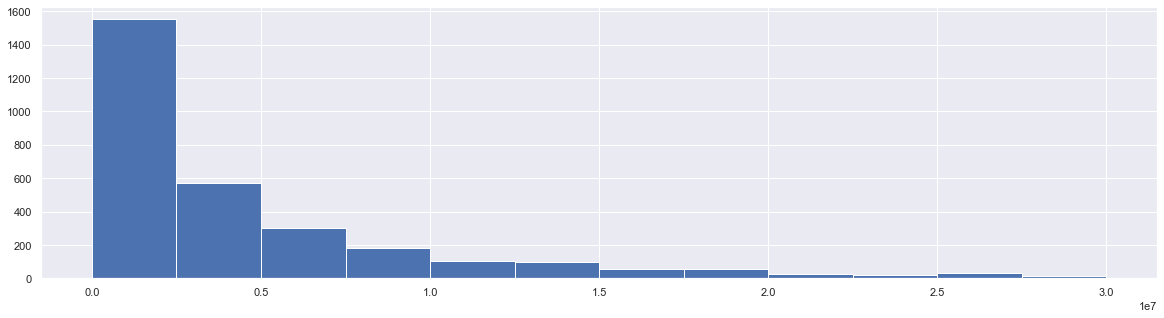

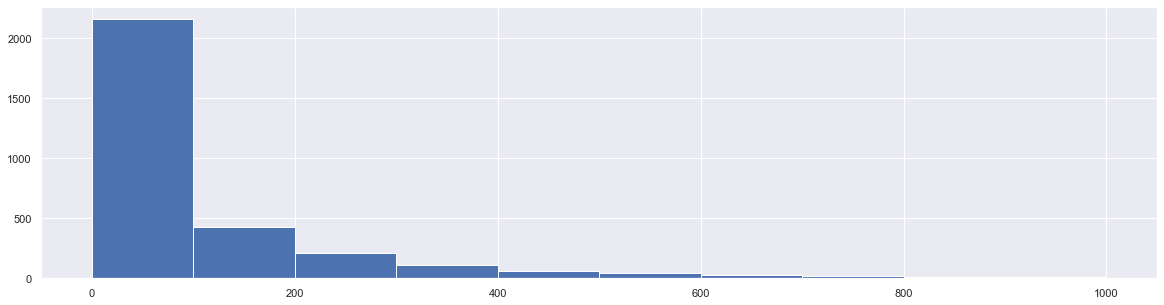

In [124]:


# 'SiteEnergyUse' :
y1_train = new_postpipeline_data['targets_pipeline__SiteEnergyUse'].values

# 'TotalGHGEmissions'
y2_train = new_postpipeline_data['targets_pipeline__TotalGHGEmissions'].values

# Distribution of 'SiteEnergyUse' :
plt.hist(y1_train, bins = 12, range=(0, 3E7))
plt.show()

# Distribution of 'TotalGHGEmissions' :
plt.hist(y2_train, bins = 10, range=(0, 1000))
plt.show()

In [125]:
new_postpipeline_data.shape

(3167, 209)

In [126]:
new_postpipeline_data.head()

,categorical_data_pipeline__BuildingType_campus,categorical_data_pipeline__BuildingType_nonresidential,categorical_data_pipeline__BuildingType_nonresidential cos,categorical_data_pipeline__BuildingType_nonresidential wa,categorical_data_pipeline__BuildingType_sps-district k-12,categorical_data_pipeline__PrimaryPropertyType_college/university,categorical_data_pipeline__PrimaryPropertyType_distribution center,categorical_data_pipeline__PrimaryPropertyType_hospital,categorical_data_pipeline__PrimaryPropertyType_hotel,categorical_data_pipeline__PrimaryPropertyType_k-12 school,...,new_numerical_data_pipeline__PropertyGFATotal,new_numerical_data_pipeline__PropertyGFAParking,new_numerical_data_pipeline__PropertyGFABuilding(s),new_numerical_data_pipeline__thermal_resistance_approach_1,new_numerical_data_pipeline__thermal_resistance_approach_2,new_numerical_data_pipeline__distance,binary_data_pipeline__UseNaturalGas,binary_data_pipeline__UseElectricity,targets_pipeline__SiteEnergyUse,targets_pipeline__TotalGHGEmissions
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.008288,0.000004,0.014832,0.021685,0.061756,0.556664,1.0,1.0,6981428.0,249.43
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.009913,0.029391,0.014839,0.022290,0.061786,0.536666,1.0,1.0,8354235.0,263.51
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.102129,0.000004,0.108054,0.036095,0.449908,0.557378,1.0,1.0,73130656.0,2061.48
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.011667,0.024311,0.016859,0.020431,0.070196,0.573167,1.0,1.0,14829099.0,507.70
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009239,0.072570,0.011807,0.041989,0.049161,0.558627,1.0,1.0,12051984.0,304.62


In [127]:
# Creation of the qualitative features from target features :

new_postpipeline_data['categ_SiteEnergyUse'] = pd.cut(new_postpipeline_data['targets_pipeline__SiteEnergyUse'], 
                                                      bins=[-1, 2.5E6, 5E6, 7.5E6, 1E7, 1.25E7, 1.5E7, 1.75E7, 2E7, 2.25E7,
                                                            2.5E7, 2.75E7, 3E7, np.inf],
                                                      labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

new_postpipeline_data['categ_TotalGHGEmissions'] = pd.cut(new_postpipeline_data['targets_pipeline__TotalGHGEmissions'], 
                                                          bins = [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, np.inf],
                                                          labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## StratifiedShuffleSplit :

# for 'SiteEnergyUse' :

dataset_split_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_1, test_index_1 in dataset_split_1.split(new_postpipeline_data, new_postpipeline_data['categ_SiteEnergyUse']):
    train_set_1 = new_postpipeline_data.loc[train_index_1]
    test_set_1 = new_postpipeline_data.loc[test_index_1]
 
# for 'TotalGHGEmissions' :

dataset_split_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index_2, test_index_2 in dataset_split_2.split(new_postpipeline_data, new_postpipeline_data['categ_TotalGHGEmissions']):
    train_set_2 = new_postpipeline_data.loc[train_index_2]
    test_set_2 = new_postpipeline_data.loc[test_index_2]
    

## Splitting of target features and input features :

X1_train = train_set_1.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X1_test = test_set_1.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_train = train_set_2.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

X2_test = test_set_2.drop(columns=['targets_pipeline__SiteEnergyUse',
                                   'targets_pipeline__TotalGHGEmissions',
                                   'categ_SiteEnergyUse',
                                   'categ_TotalGHGEmissions'])

y1_train = train_set_1['targets_pipeline__SiteEnergyUse']

y1_test = test_set_1['targets_pipeline__SiteEnergyUse']

y2_train = train_set_2['targets_pipeline__TotalGHGEmissions']

y2_test = test_set_2['targets_pipeline__TotalGHGEmissions']

## Modelisation 

### First : test of improvement generated by new engineered features with the same model as Baseline :

**SiteEnergyUse :**

In [128]:
lr1 = linear_model.Lasso()
lr1.fit(X1_train, y1_train)

C:\Users\may81\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.285e+16, tolerance: 1.695e+14
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [129]:
y1_pred = lr1.predict(X1_test)

RMSE_Baseline_afterFE_EnergyUse = np.format_float_scientific(np.sqrt(mean_squared_error(y1_test, y1_pred)))
MAE_Baseline_afterFE_EnergyUse = np.format_float_scientific(mean_absolute_error(y1_test, y1_pred))
R2_Baseline_afterFE_EnergyUse = r2_score(y1_test, y1_pred)

print("RMSE between y1_test and y1_pred : ", RMSE_Baseline_afterFE_EnergyUse)
print("MAE between y1_test and y1_pred : ", MAE_Baseline_afterFE_EnergyUse)
print("R² between y1_test and y1_pred : ", R2_Baseline_afterFE_EnergyUse)
print('')
print("Reminder of the mean of this target : ", np.format_float_scientific(y1_test.mean()))

dif_RMSE = float(RMSE_Baseline_afterFE_EnergyUse)-float(RMSE_Baseline_EnergyUse)
dif_MAE = float(MAE_Baseline_afterFE_EnergyUse)-float(MAE_Baseline_EnergyUse)
dif_R2 = float(R2_Baseline_afterFE_EnergyUse)-float(R2_Baseline_EnergyUse)
print('')

print("Difference between new RMSE and former RMSE with new engineered features : ", dif_RMSE)

print("Difference between new MAE and former MAE with new engineered features : ", dif_MAE)

print("Difference between new R² and former R² with new engineered features : ", dif_R2)

RMSE between y1_test and y1_pred :  1.4499350820492152e+07
MAE between y1_test and y1_pred :  5.461872684842862e+06
R² between y1_test and y1_pred :  0.6701972474574196

Reminder of the mean of this target :  8.71763356659227e+06

Difference between new RMSE and former RMSE with new engineered features :  -429331.5465159025
Difference between new MAE and former MAE with new engineered features :  -383127.6321793543
Difference between new R² and former R² with new engineered features :  0.019820344463159834


Performances on the same model but with new engineered features are a little bit better than the baseline model.

**TotalGHGEmissions**

In [130]:
lr2 = linear_model.Lasso()
lr2.fit(X2_train, y2_train)

Lasso()

In [131]:
y2_pred = lr2.predict(X2_test)

RMSE_Baseline_afterFE_Emissions = np.format_float_scientific(np.sqrt(mean_squared_error(y2_test, y2_pred)))
MAE_Baseline_afterFE_Emissions = np.format_float_scientific(mean_absolute_error(y2_test, y2_pred))
R2_Baseline_afterFE_Emissions = r2_score(y2_test, y2_pred)

print("RMSE between y2_test and y2_pred : ", RMSE_Baseline_afterFE_Emissions)
print("MAE between y2_test and y2_pred : ", MAE_Baseline_afterFE_Emissions)
print("R² between y2_test and y2_pred : ", R2_Baseline_afterFE_Emissions)
print('')
print("Reminder of the mean of this target : ", np.format_float_scientific(y2_test.mean()))

dif_RMSE_2 = float(RMSE_Baseline_afterFE_Emissions)-float(RMSE_Baseline_Emissions)
dif_MAE_2 = float(MAE_Baseline_afterFE_Emissions)-float(MAE_Baseline_Emissions)
dif_R2_2 = float(R2_Baseline_afterFE_Emissions)-float(R2_Baseline_Emissions)
print('')

print("Difference between new RMSE and former RMSE with new engineered features for TotalGHGEmissions: ", dif_RMSE_2)

print("Difference between new MAE and former MAE with new engineered features for TotalGHGEmissions: ", dif_MAE_2)

print("Difference between new R² and former R² with new engineered features for TotalGHGEmissions: ", dif_R2_2)

RMSE between y2_test and y2_pred :  3.4393755516165805e+02
MAE between y2_test and y2_pred :  1.5087389774670368e+02
R² between y2_test and y2_pred :  0.5817390686973604

Reminder of the mean of this target :  1.6351458990536278e+02

Difference between new RMSE and former RMSE with new engineered features for TotalGHGEmissions:  -0.8650944502177822
Difference between new MAE and former MAE with new engineered features for TotalGHGEmissions:  0.010345883320297844
Difference between new R² and former R² with new engineered features for TotalGHGEmissions:  0.00210672118169708
